In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv(r"C:\Users\admin\Documents\Data Science\Assignment\Multi Linear Regression\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#Check for shape
df.shape

(50, 5)

In [4]:
#Descriptive Analysis:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


As we can see from above descriptive analysis count of all features are 50. so no null values in data.

In [5]:
#Check for null values:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#check for duplicate values:
df.duplicated().sum()

0

In [7]:
#Check for data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


from above info we can say that data is correct.

# EDA

In [8]:
#Rename the column R&D Spend:
df.rename(columns={'R&D Spend':'RnD_Spend','Marketing Spend':'Marketing_Spend'}, inplace=True)
df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')

<AxesSubplot:>

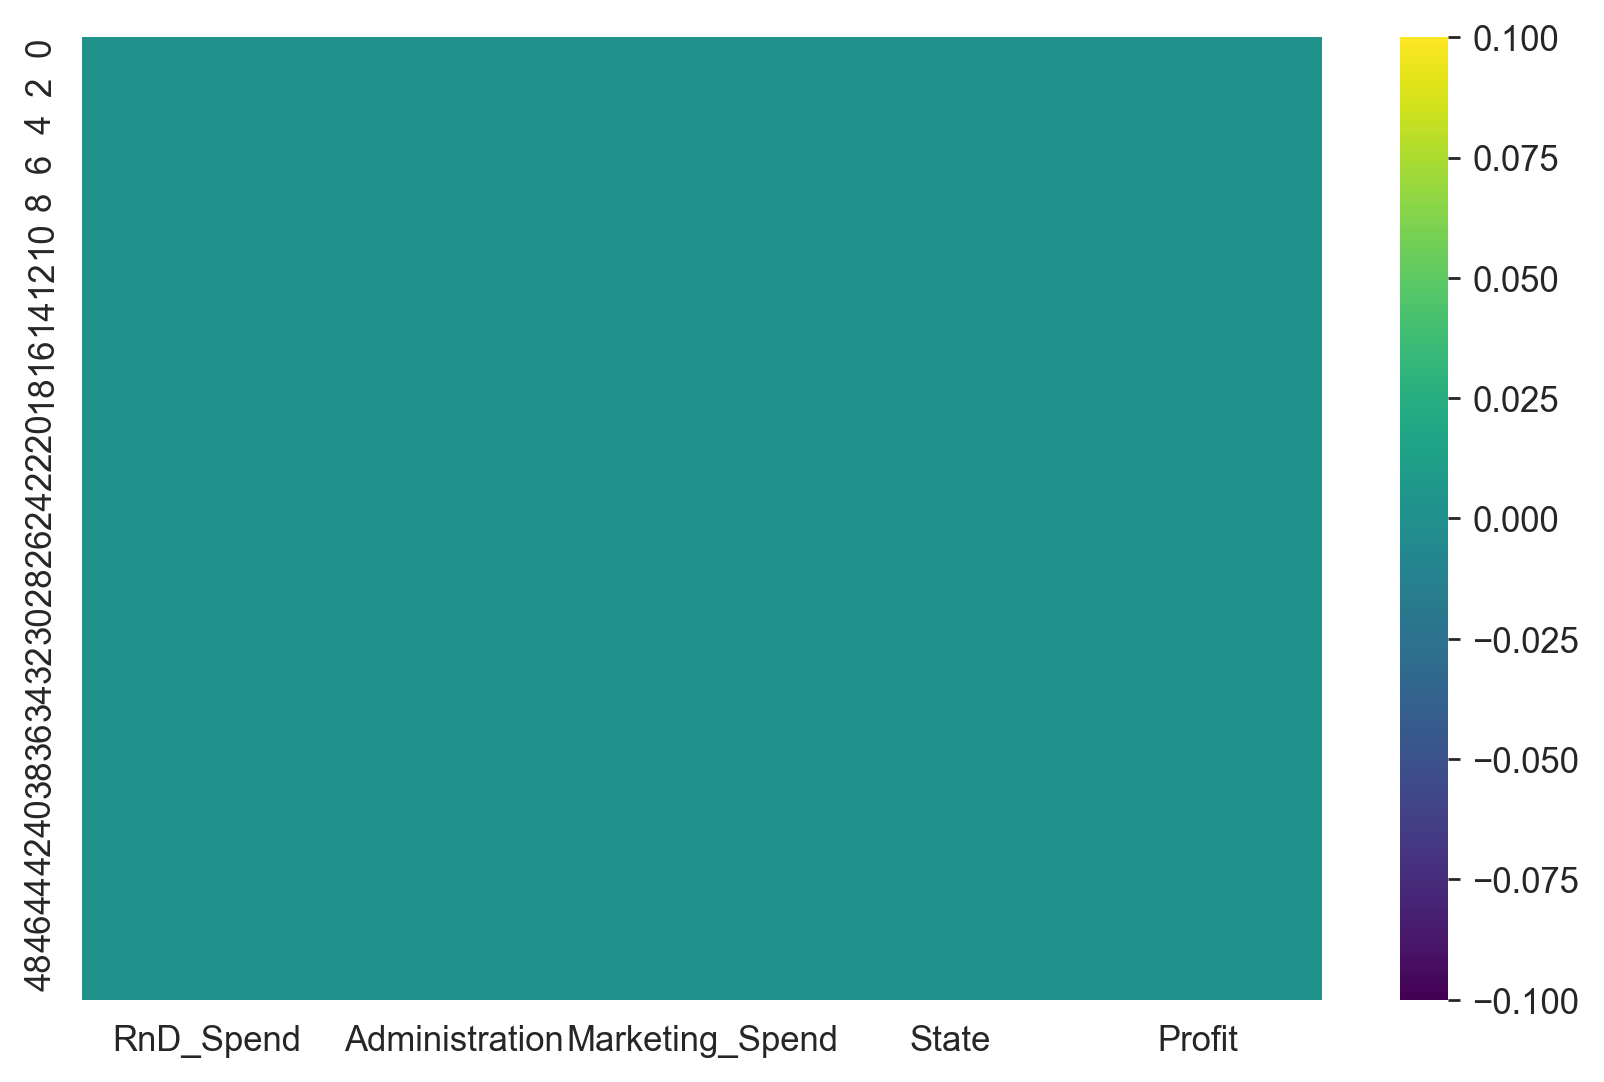

In [10]:
#Visualization for missing values:
sns.heatmap(df.isnull(), cmap='viridis')

- No missing values 

# Check for the Outliers:

Before checking for outliers we have to look for Zero value in data of pricing column:

In [11]:
#Look for Zero Value in a data:
df[df.values==0.0]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [12]:
#Print number of Zero Value in a data:
print("number of zero values in RnD_Spend is",(df['RnD_Spend']==0).sum(),'\n',
     "number of zero values in Administration Spend is",(df['Administration']==0).sum(),'\n',
      "number of zero value in marketing_spend is", (df['Marketing_Spend']==0).sum(),'\n',
      "number of zero value in profit is", (df['Profit']==0).sum())

number of zero values in RnD_Spend is 2 
 number of zero values in Administration Spend is 0 
 number of zero value in marketing_spend is 3 
 number of zero value in profit is 0


<AxesSubplot:>

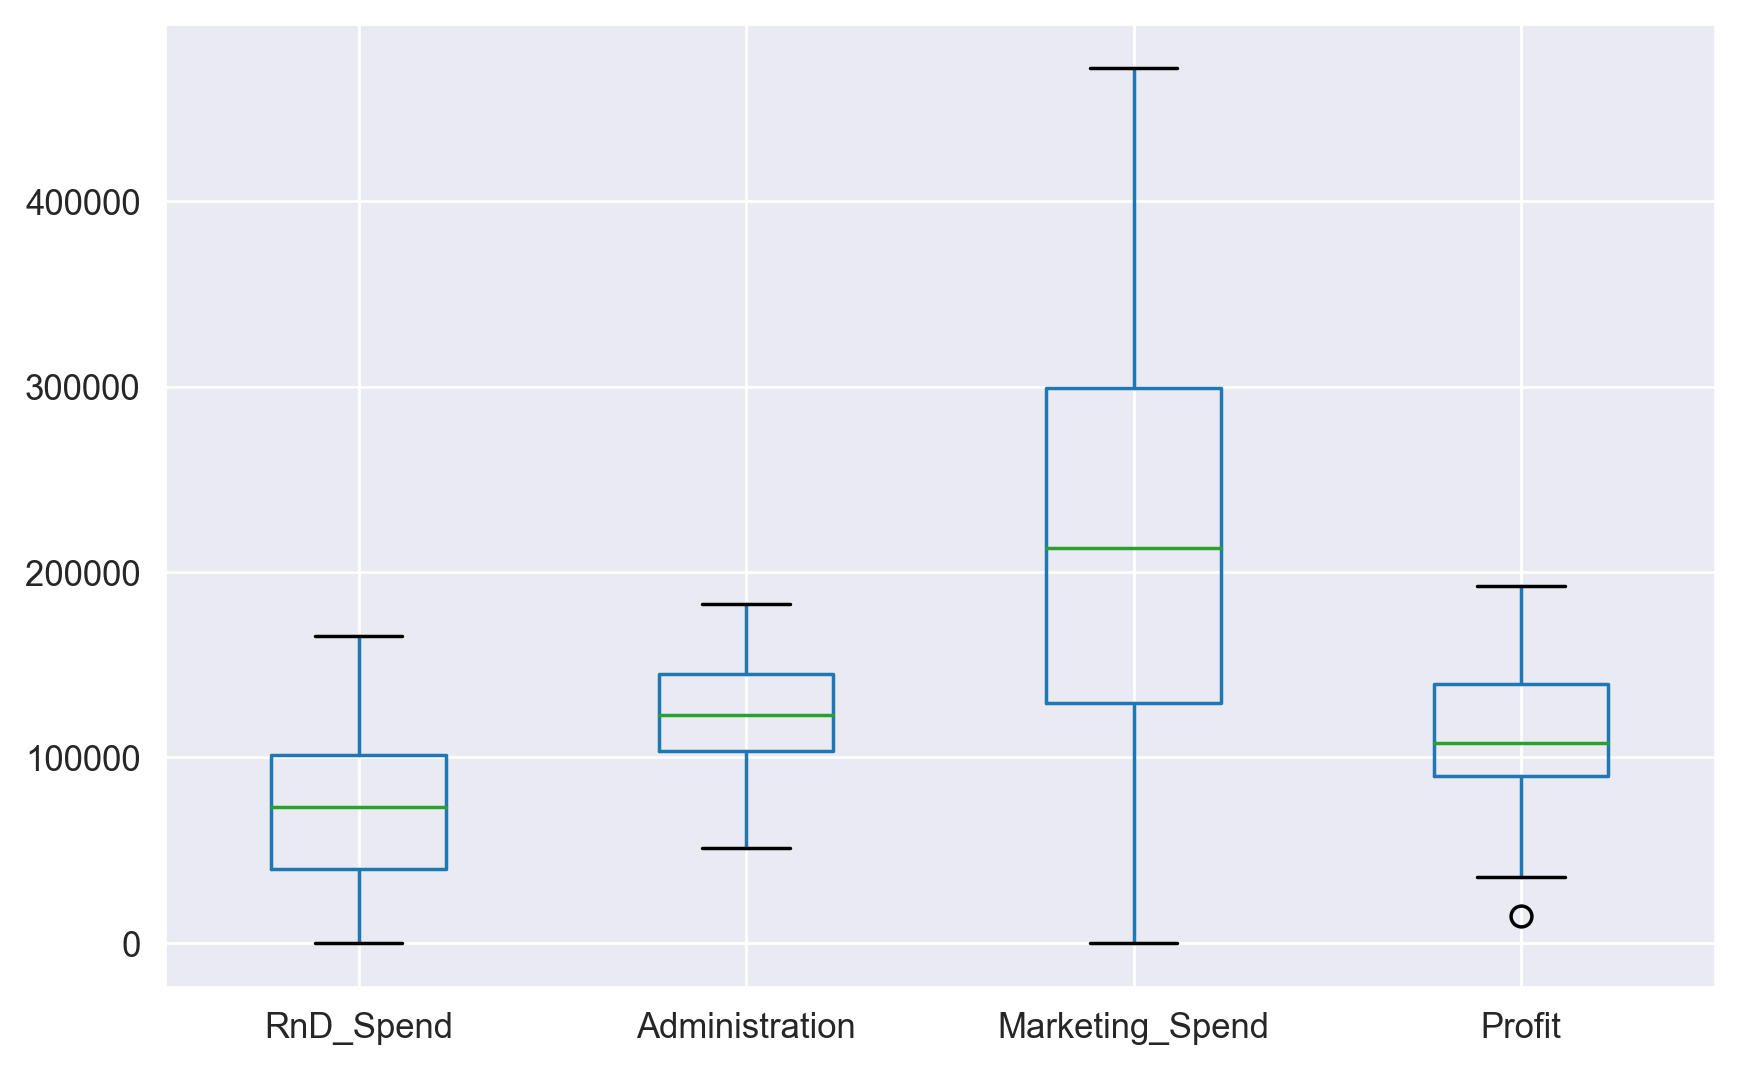

In [13]:
#Check for a outliers in data:
df.boxplot()

From above visualization we found that their is an outlier in a Profit feature

# Treat the outlier

In [14]:
#Import liabraty for boxplot statestic analysis
from matplotlib.cbook import boxplot_stats

In [15]:
#apply boxplot_stats on profit feature to find out the ouliers
boxplot_stats(df['Profit'])

[{'mean': 112012.63920000002,
  'iqr': 49627.07499999998,
  'cilo': 96959.41464343264,
  'cihi': 118996.96535656737,
  'whishi': 192261.83,
  'whislo': 35673.41,
  'fliers': array([14681.4]),
  'q1': 90138.9025,
  'med': 107978.19,
  'q3': 139765.97749999998}]

<AxesSubplot:xlabel='Profit'>

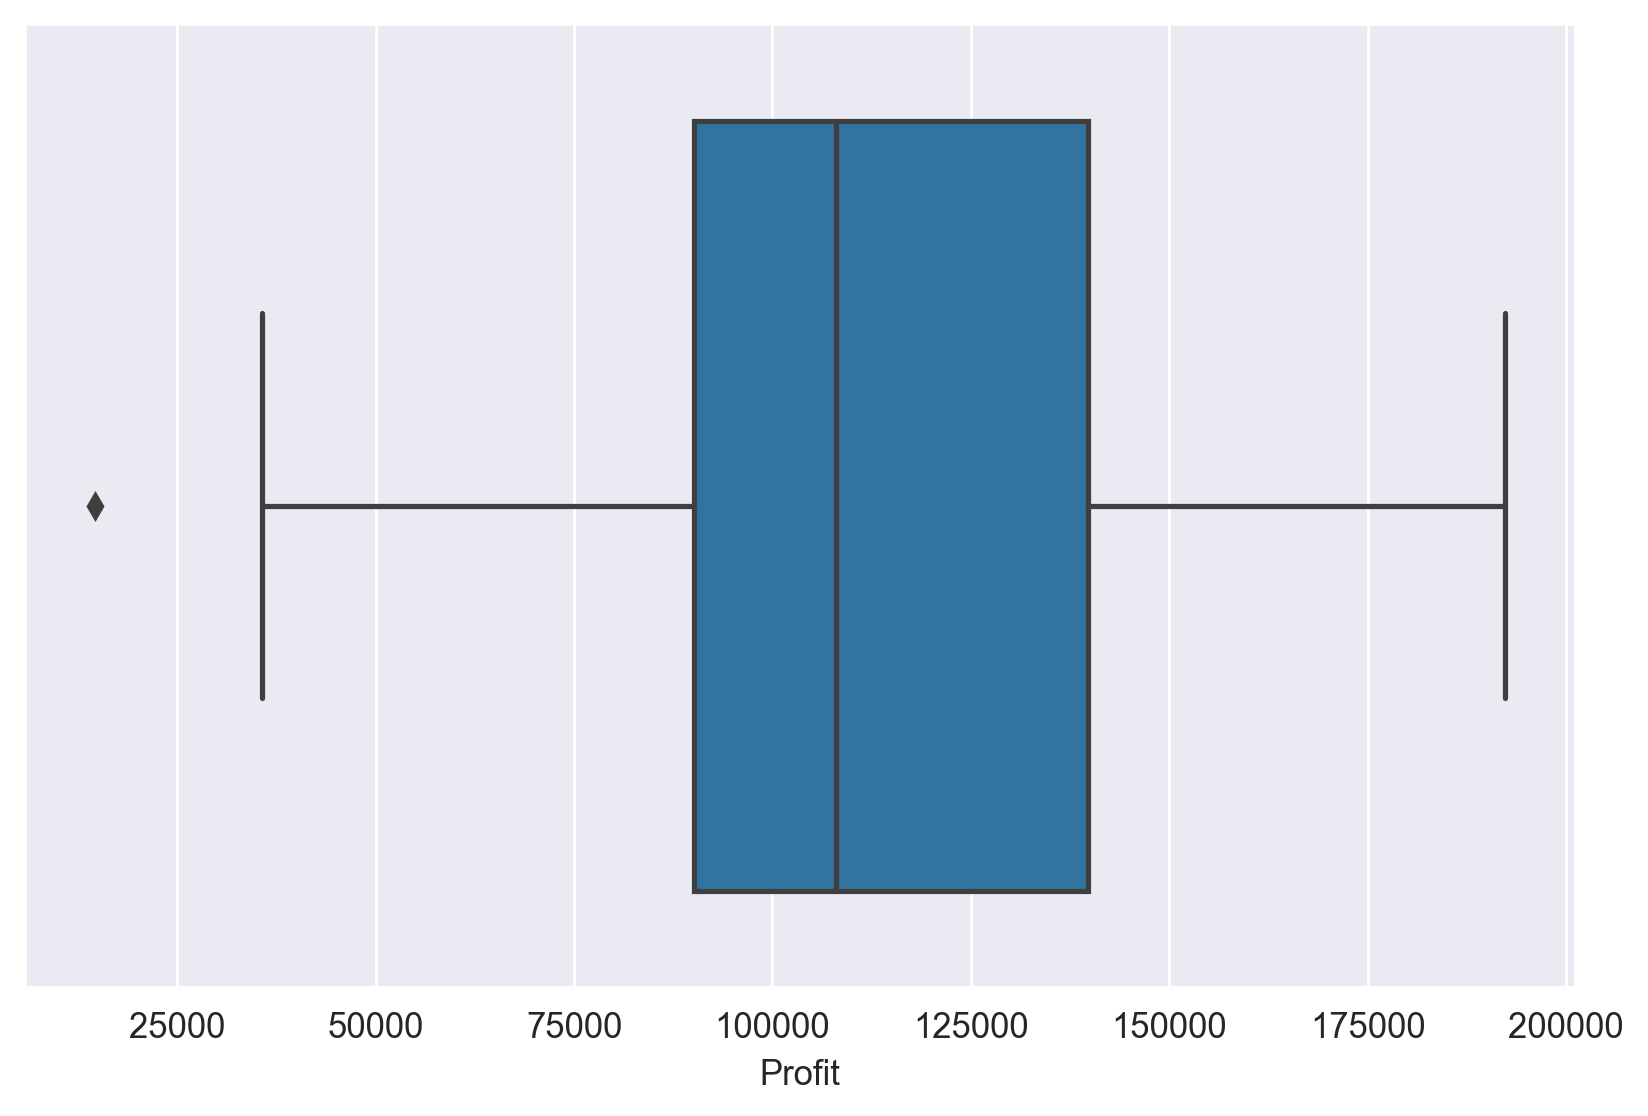

In [16]:
sns.boxplot(df['Profit'])

In [17]:
#Outlier detection
boxplot_stats(df['Profit'])[0]['fliers']

array([14681.4])

In [18]:
#Calculate the Median Value:
df['Profit'].median()

107978.19

In [19]:
#Find out the row which has a outlier
df[df['Profit']==14681.4]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [20]:
#Fill outler with median:
df['Profit'].replace(14681.4, (df['Profit'].median()), inplace=True)

In [21]:
df

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
boxplot_stats(df['Profit'])[0]['fliers']

array([], dtype=float64)

<AxesSubplot:xlabel='Profit'>

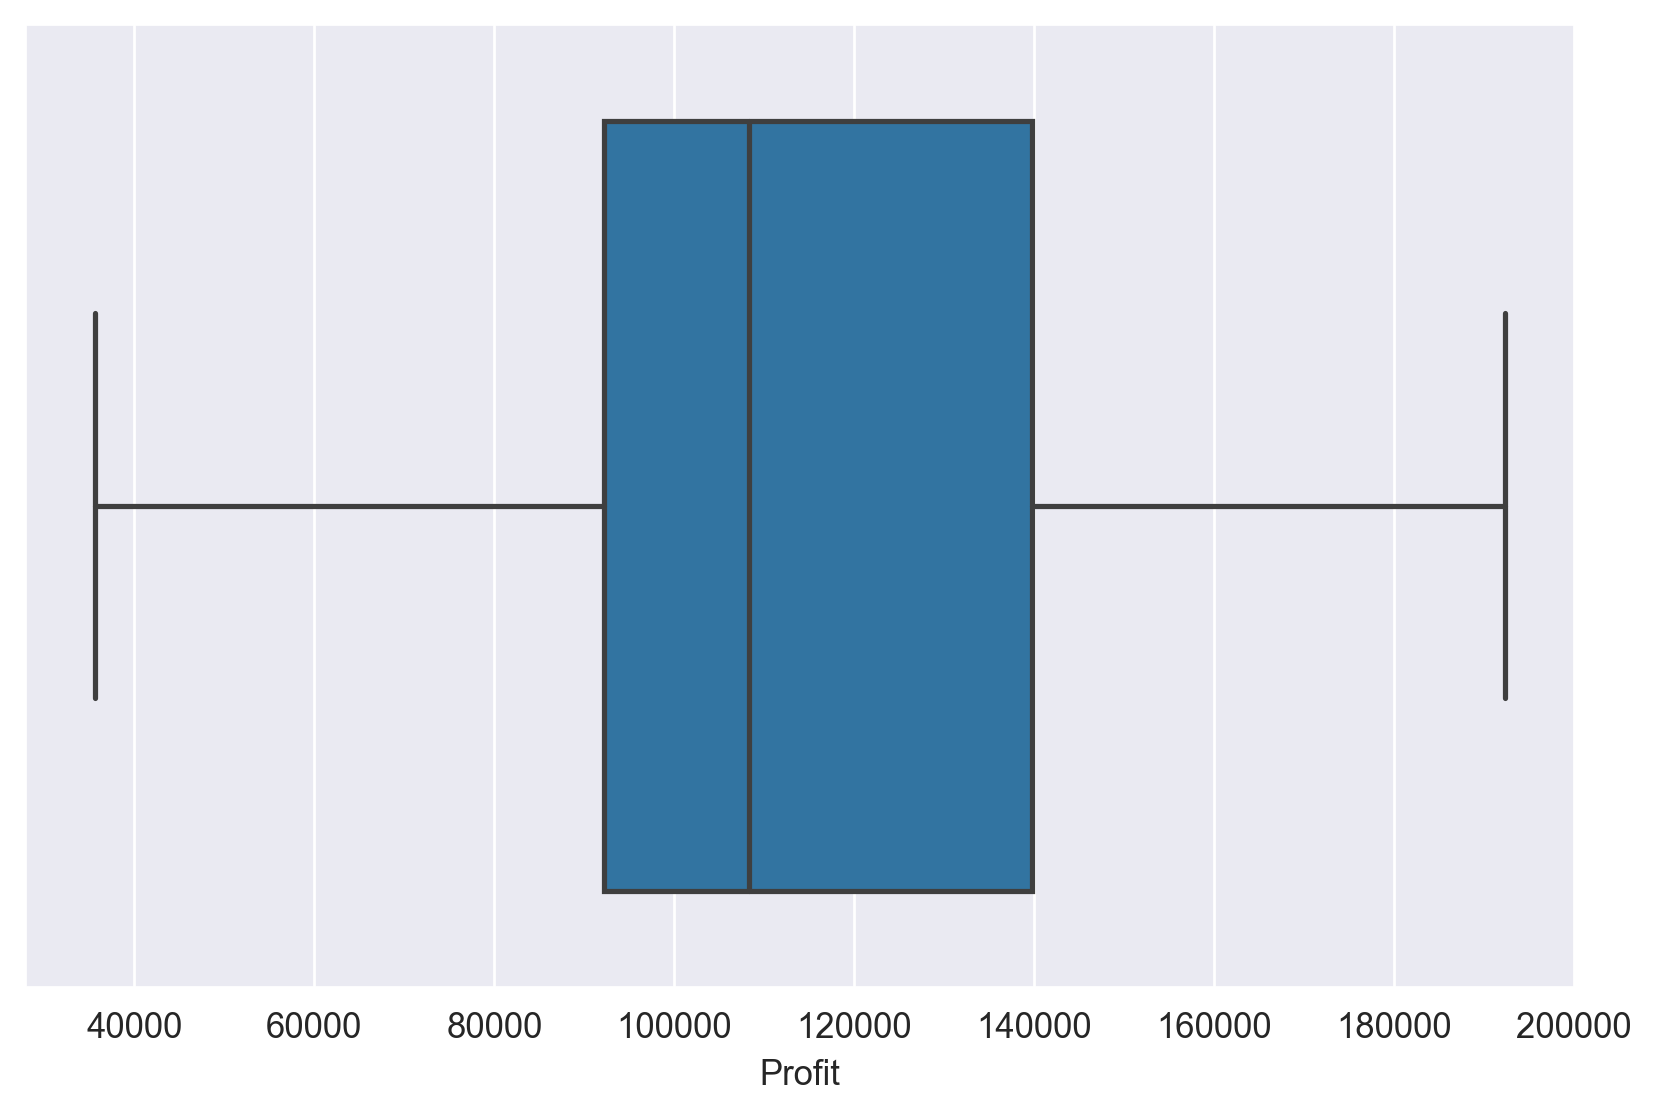

In [23]:
sns.boxplot(df['Profit'])

- As per above boxplot no outliers are in profit feature

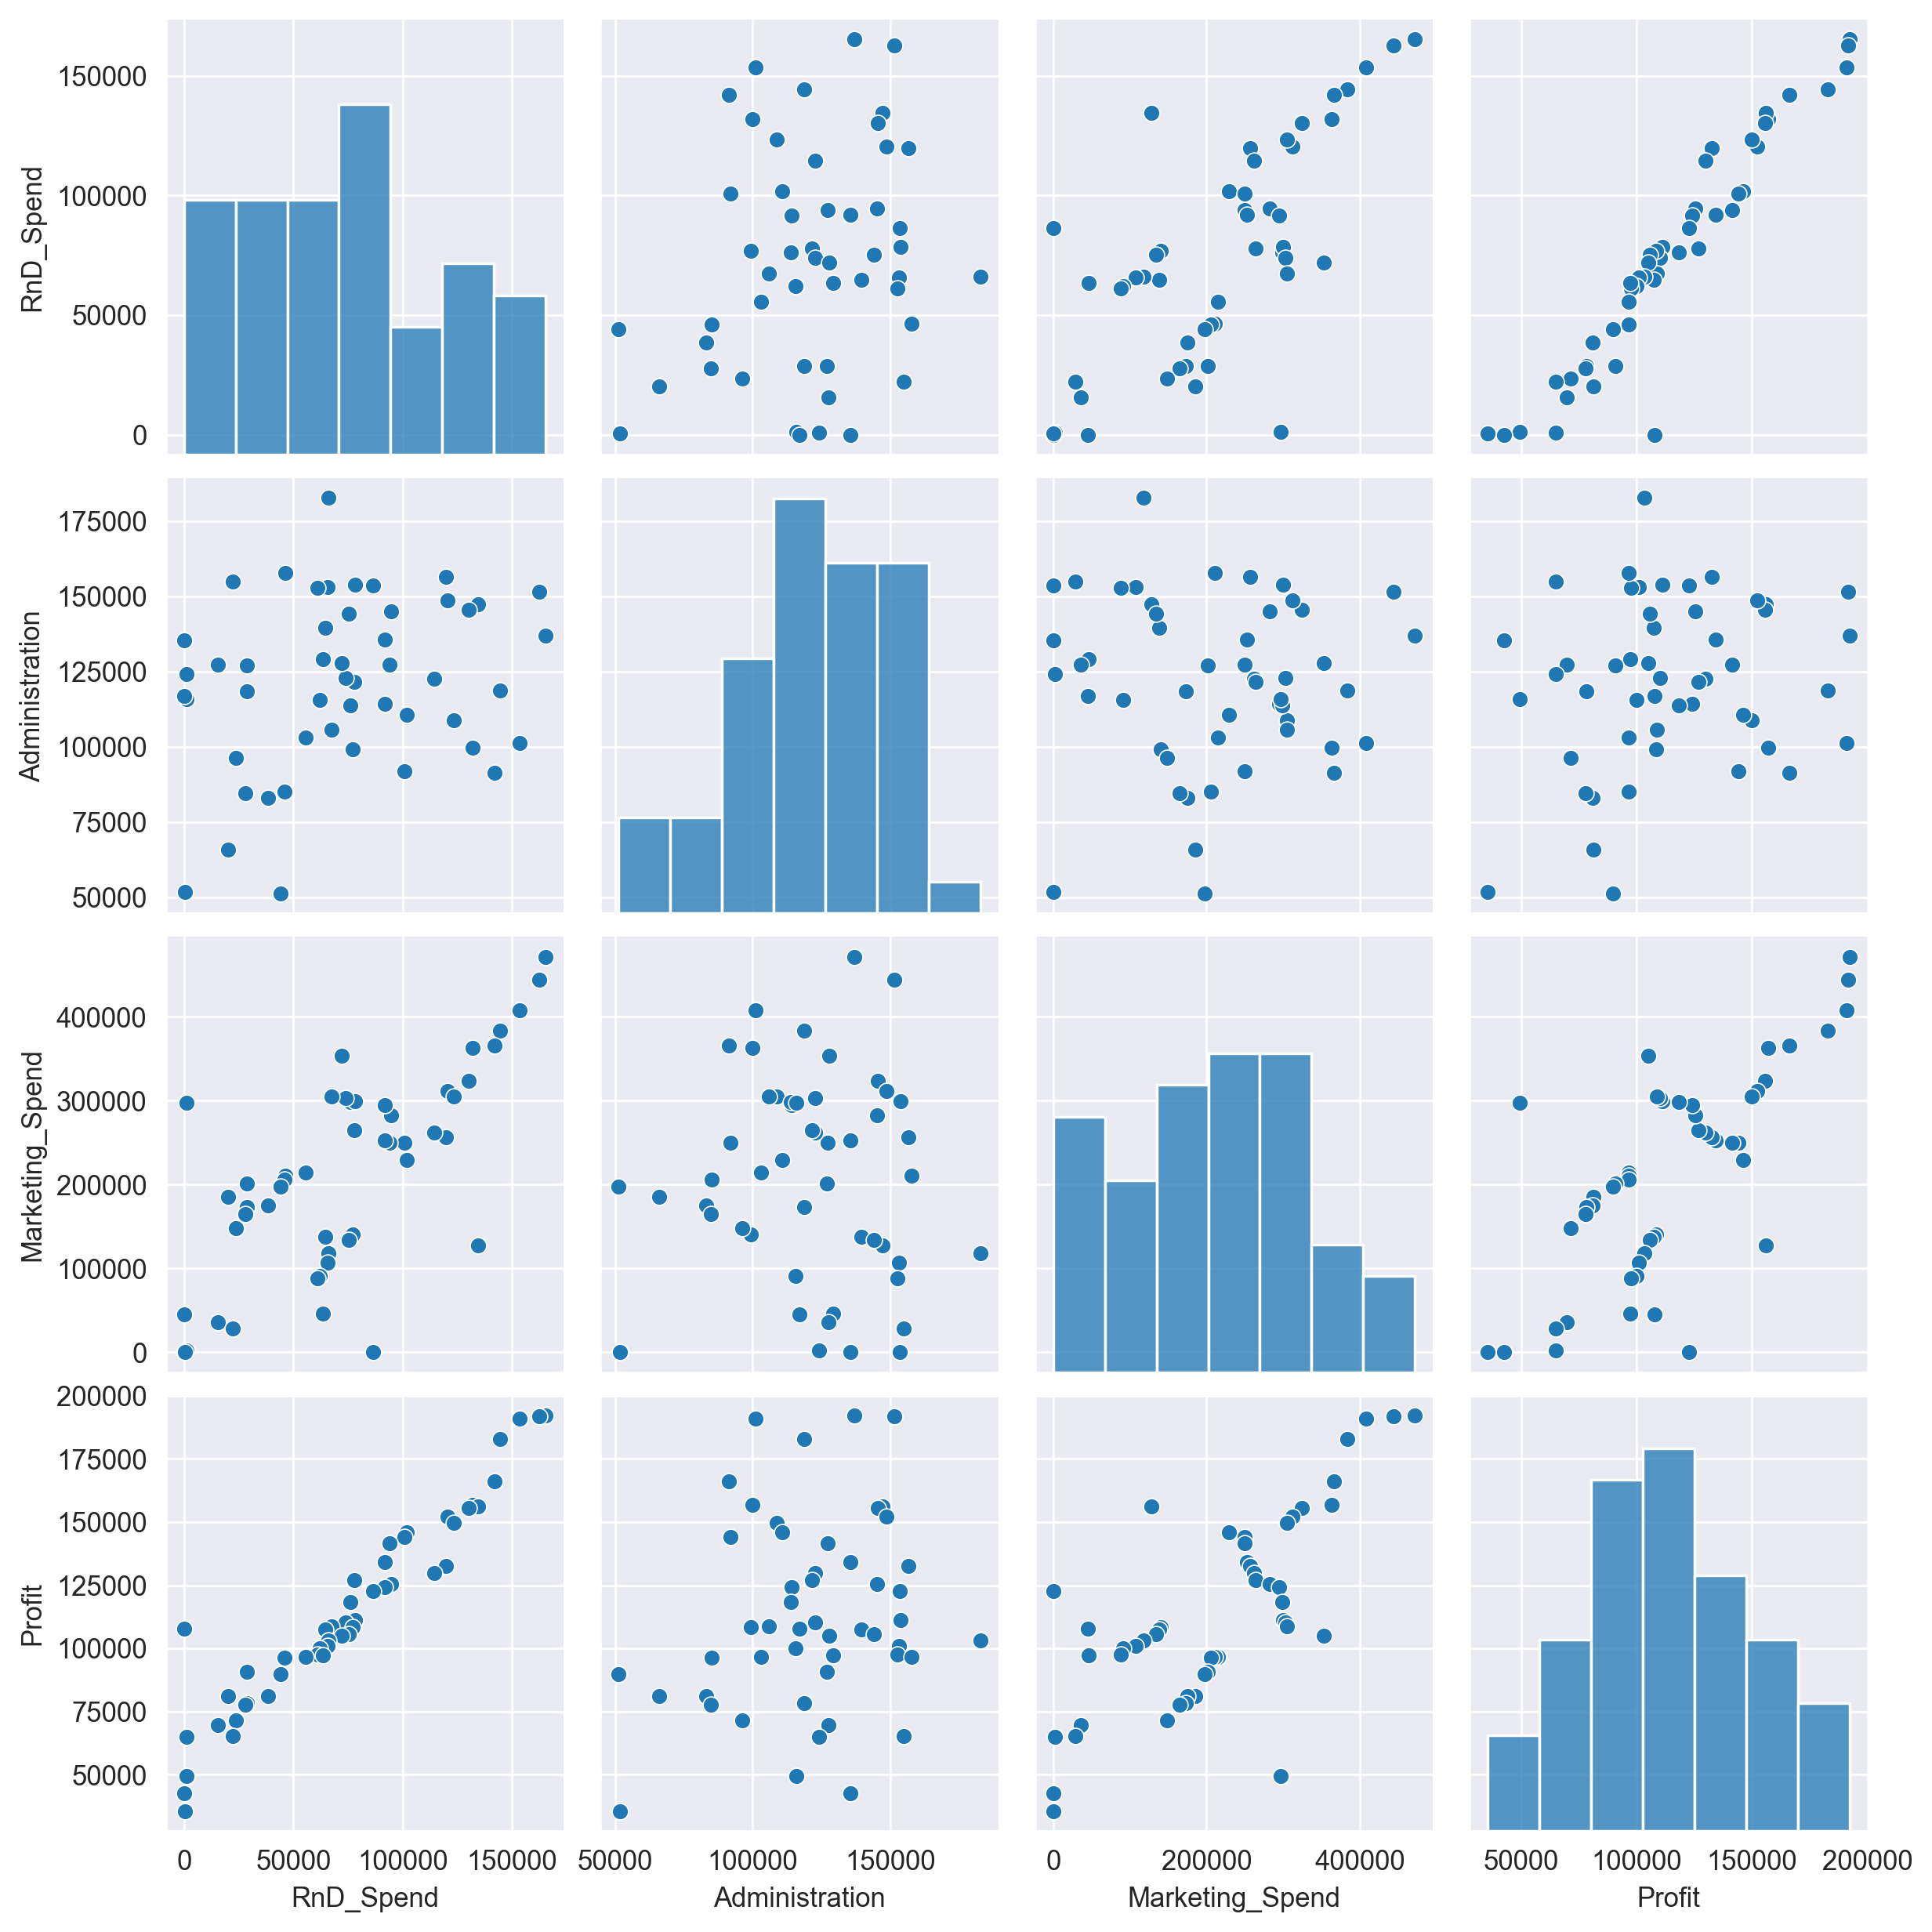

In [24]:
#Let check the relationship of dependent variable and independent variable:
sns.pairplot(df)

Obervation from above pairplot:   

Relation between Dependent variable(Profit) and independent variable:
1. Stong relation between Profit and R&D_Spend
2. Stong relation between Profit and Markeing_Spend

<AxesSubplot:>

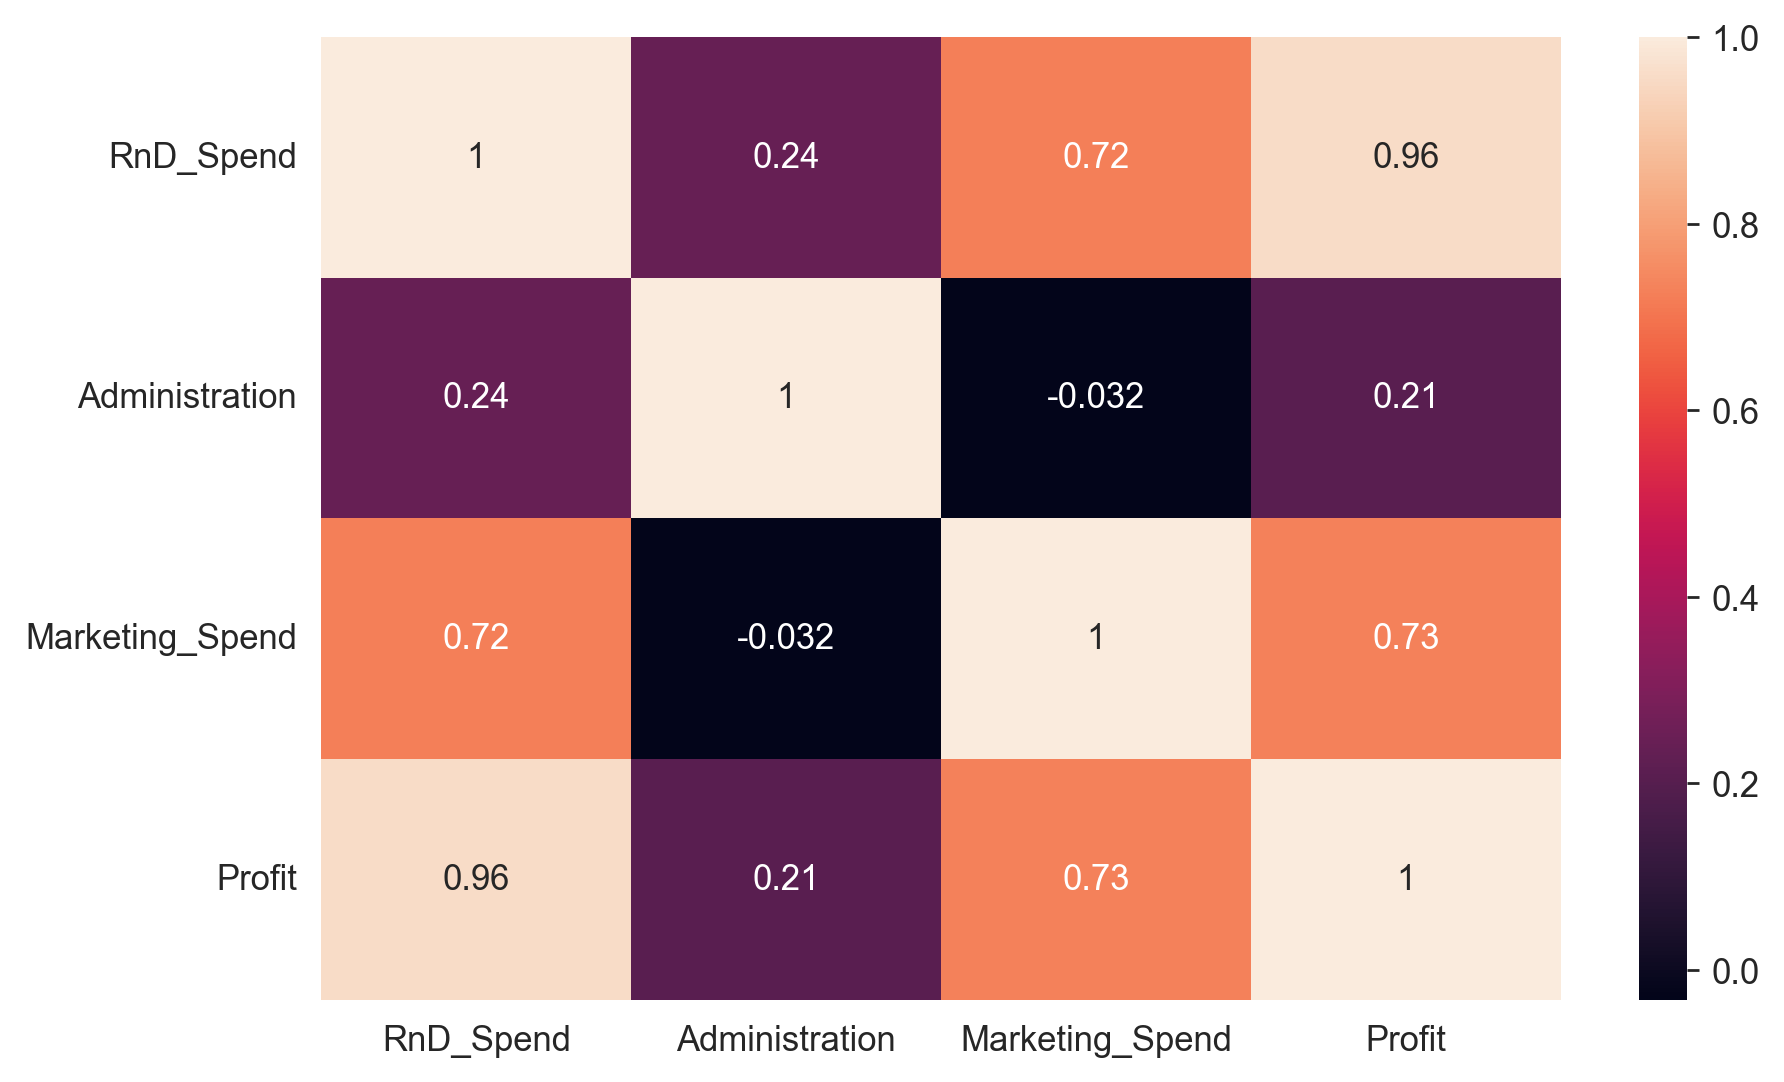

In [25]:
#Visulization by heatmap:
sns.heatmap(df.corr(), annot=True)

In [26]:
df.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.956777
Administration,0.241955,1.000000,-0.032154,0.206243
Marketing_Spend,0.724248,-0.032154,1.000000,0.729236
Profit,0.956777,0.206243,0.729236,1.000000


# Check for distribution of all feaures

In [27]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Profit')

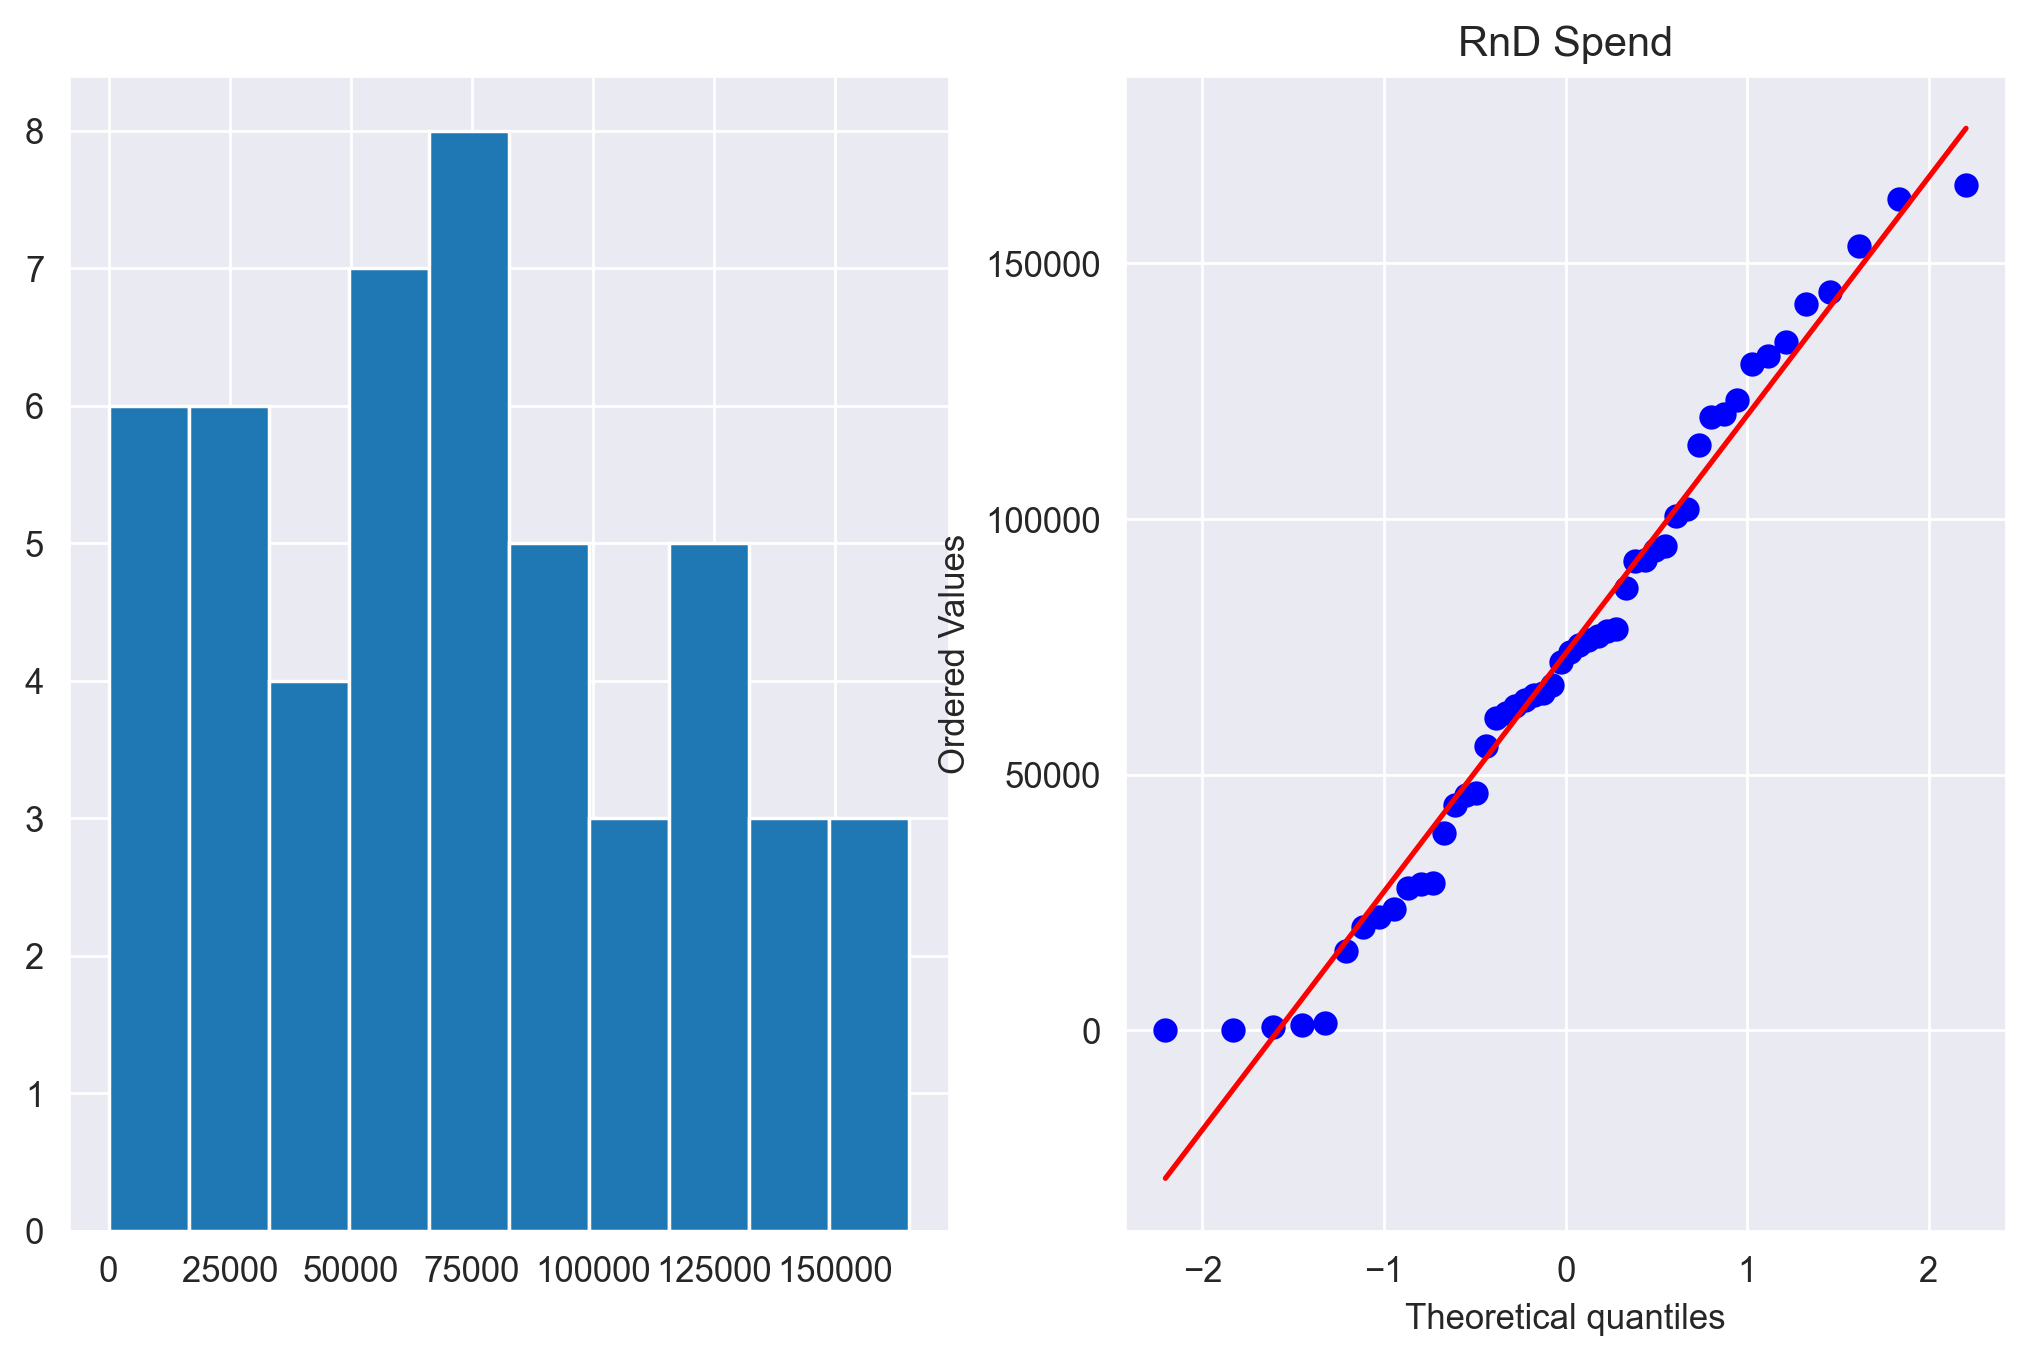

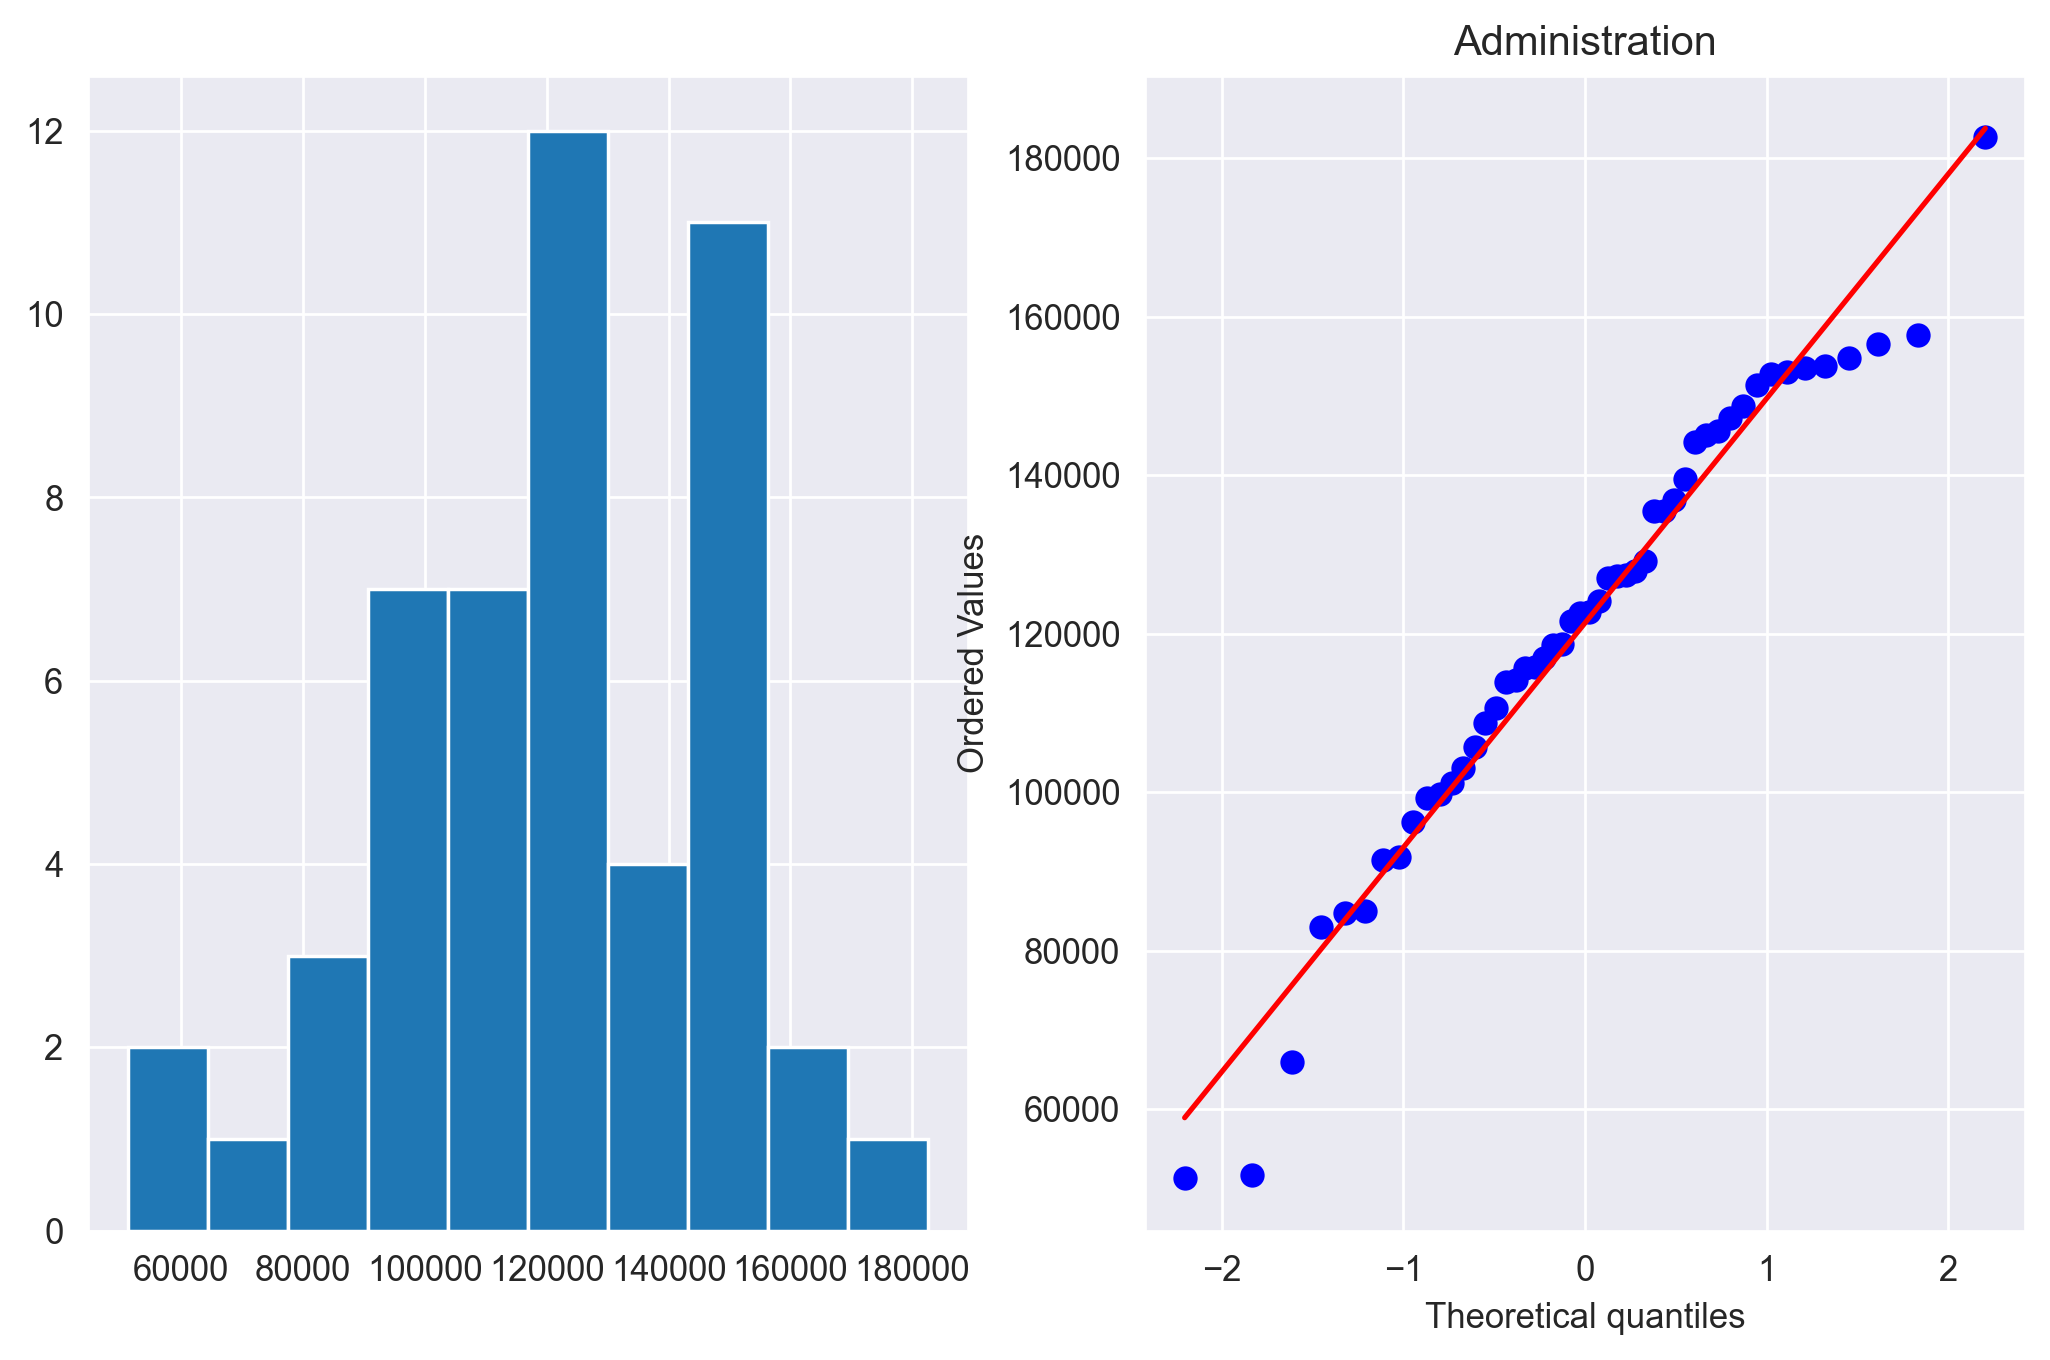

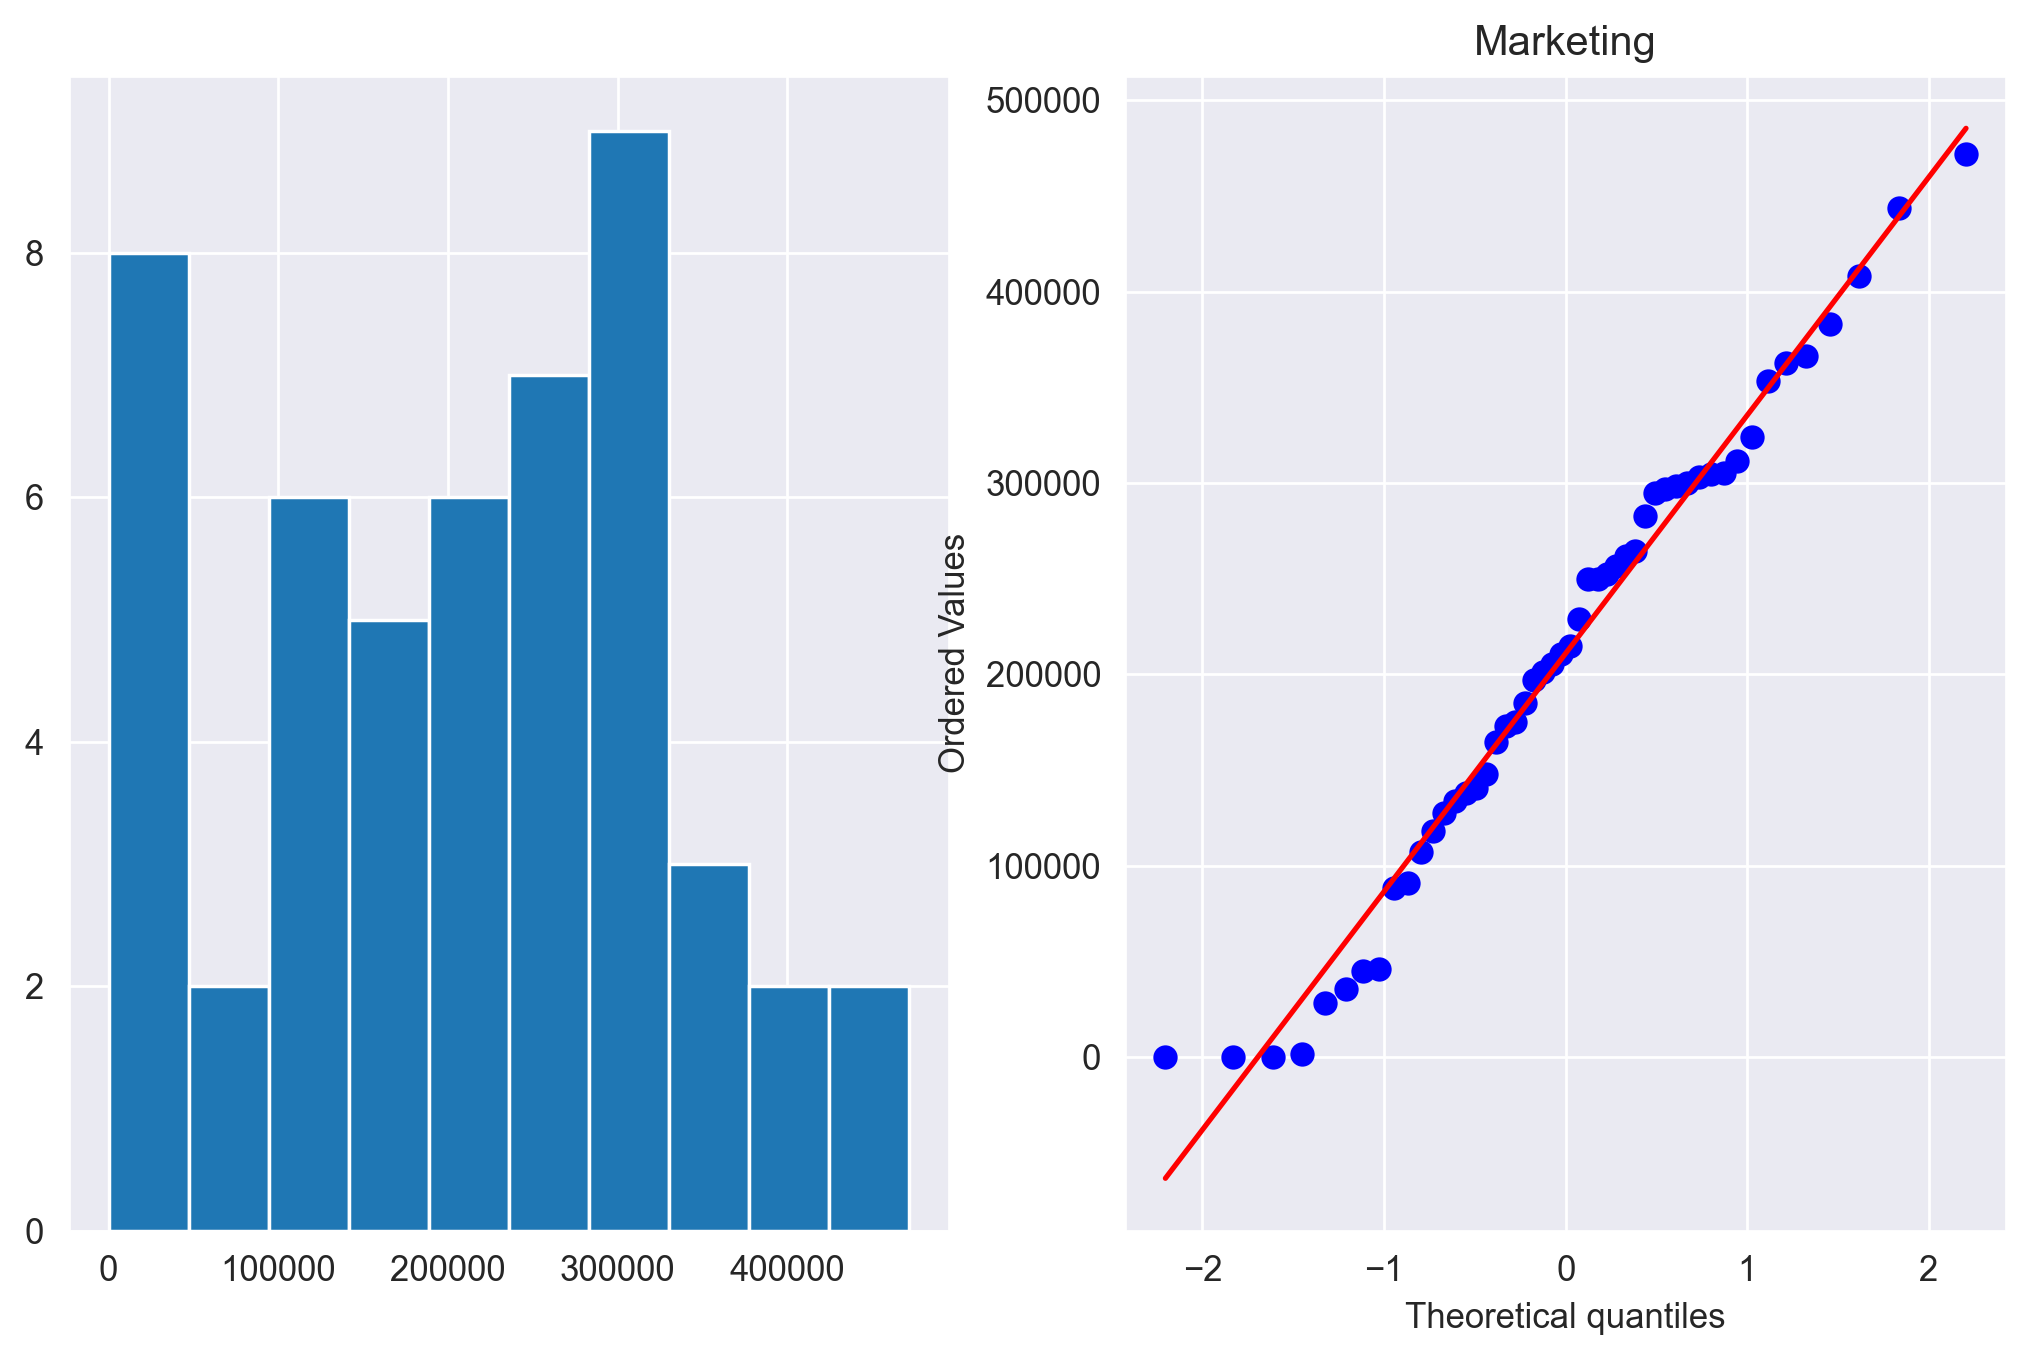

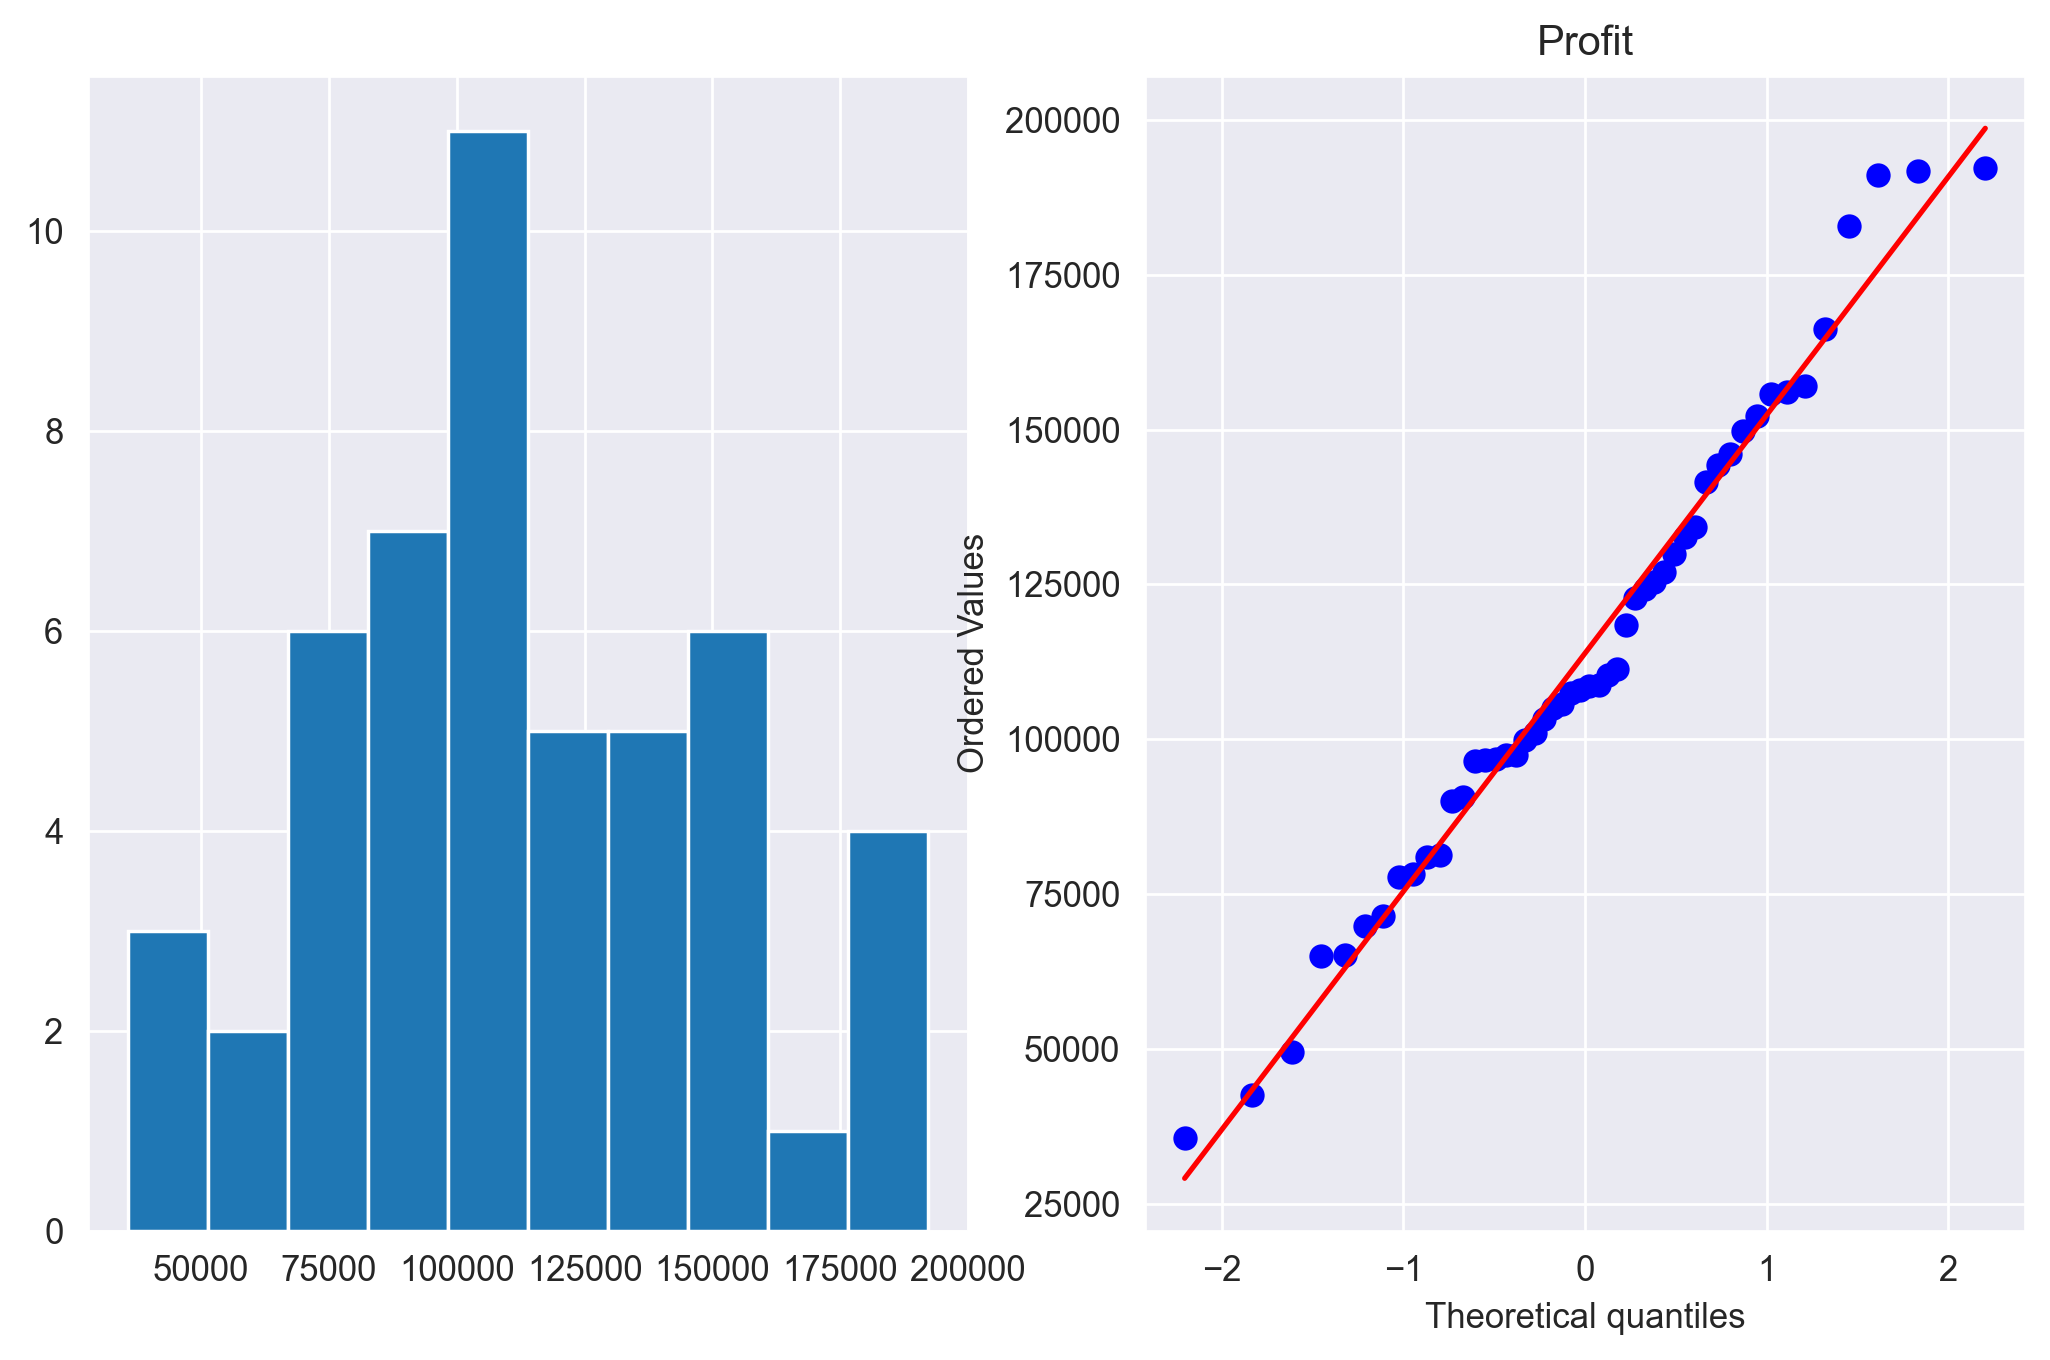

In [28]:
plot_data(df,'RnD_Spend')
plt.title('RnD Spend')
plot_data(df,'Administration')
plt.title('Administration')
plot_data(df,'Marketing_Spend')
plt.title('Marketing')
plot_data(df,'Profit')
plt.title('Profit')

<AxesSubplot:xlabel='State', ylabel='Profit'>

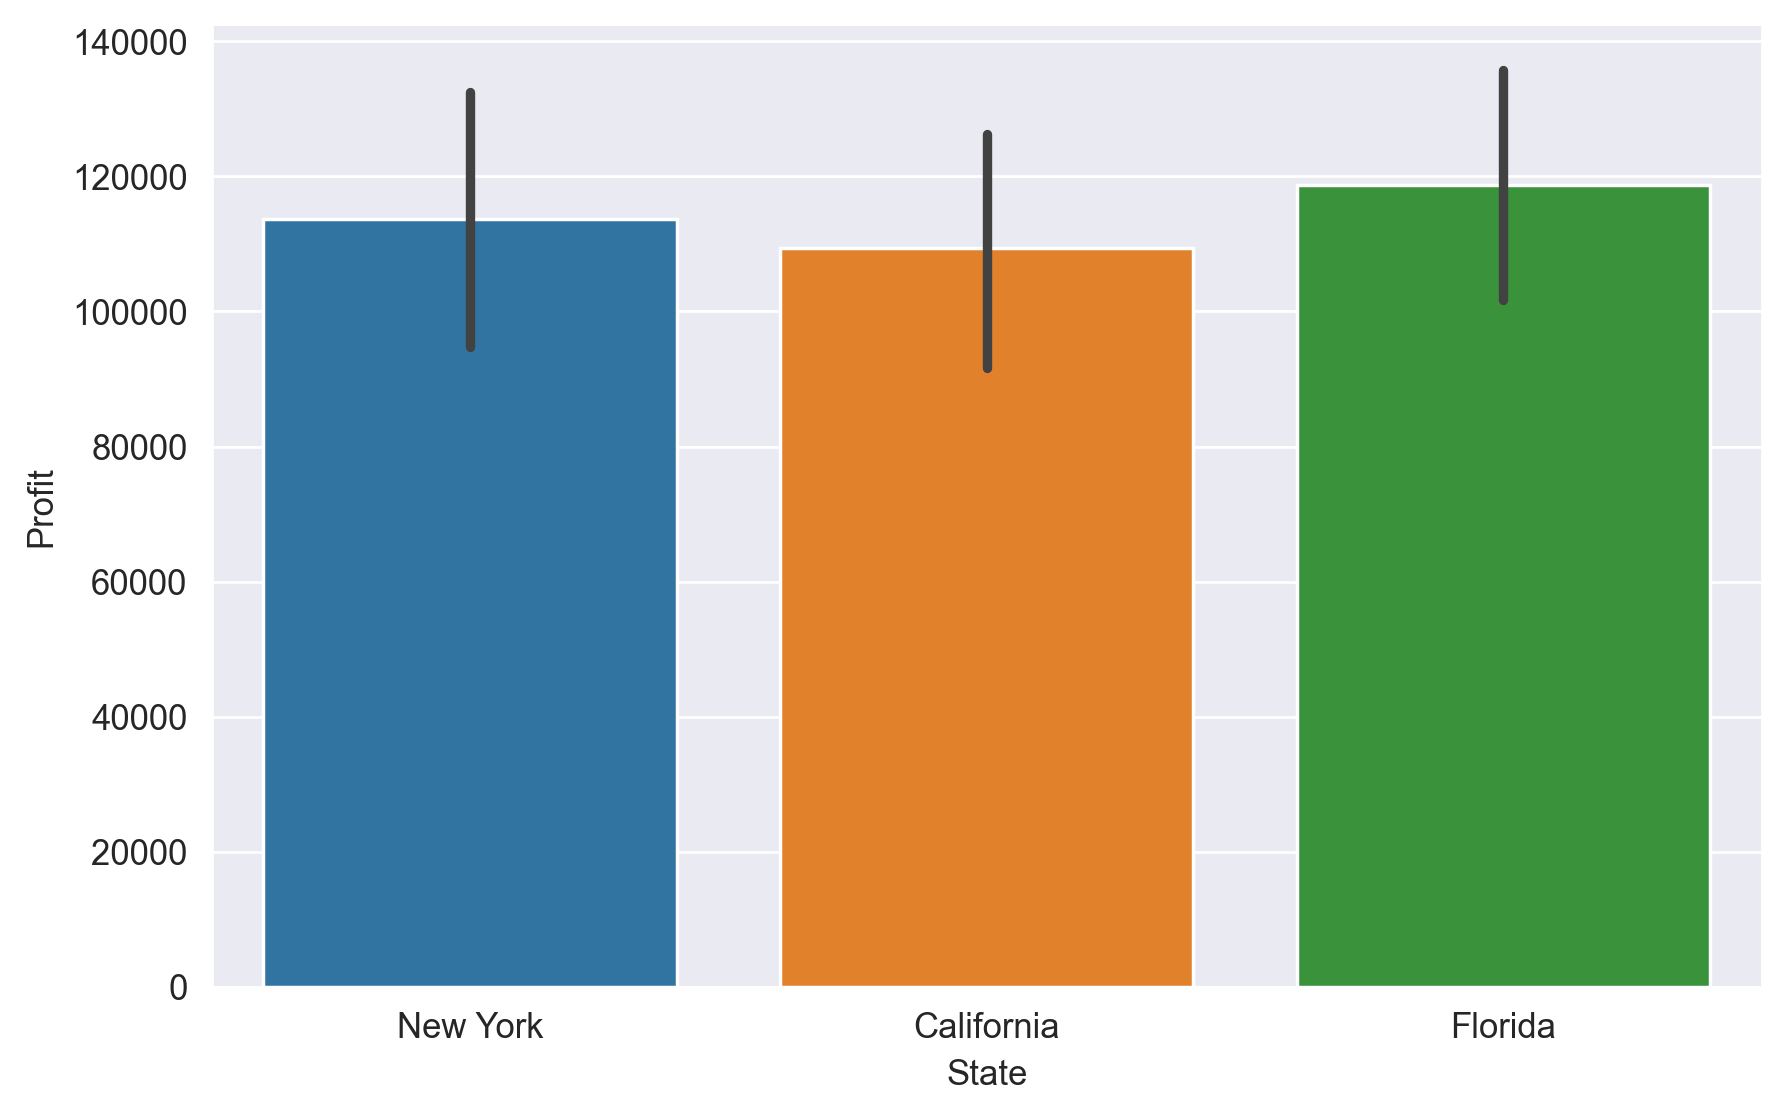

In [29]:
#check the impact of state feature on profit:
sns.barplot(x=df['State'], y=df['Profit'])

from above visualization we can say that state is not affected on profit.
as it is equaly distributed.

<AxesSubplot:ylabel='State'>

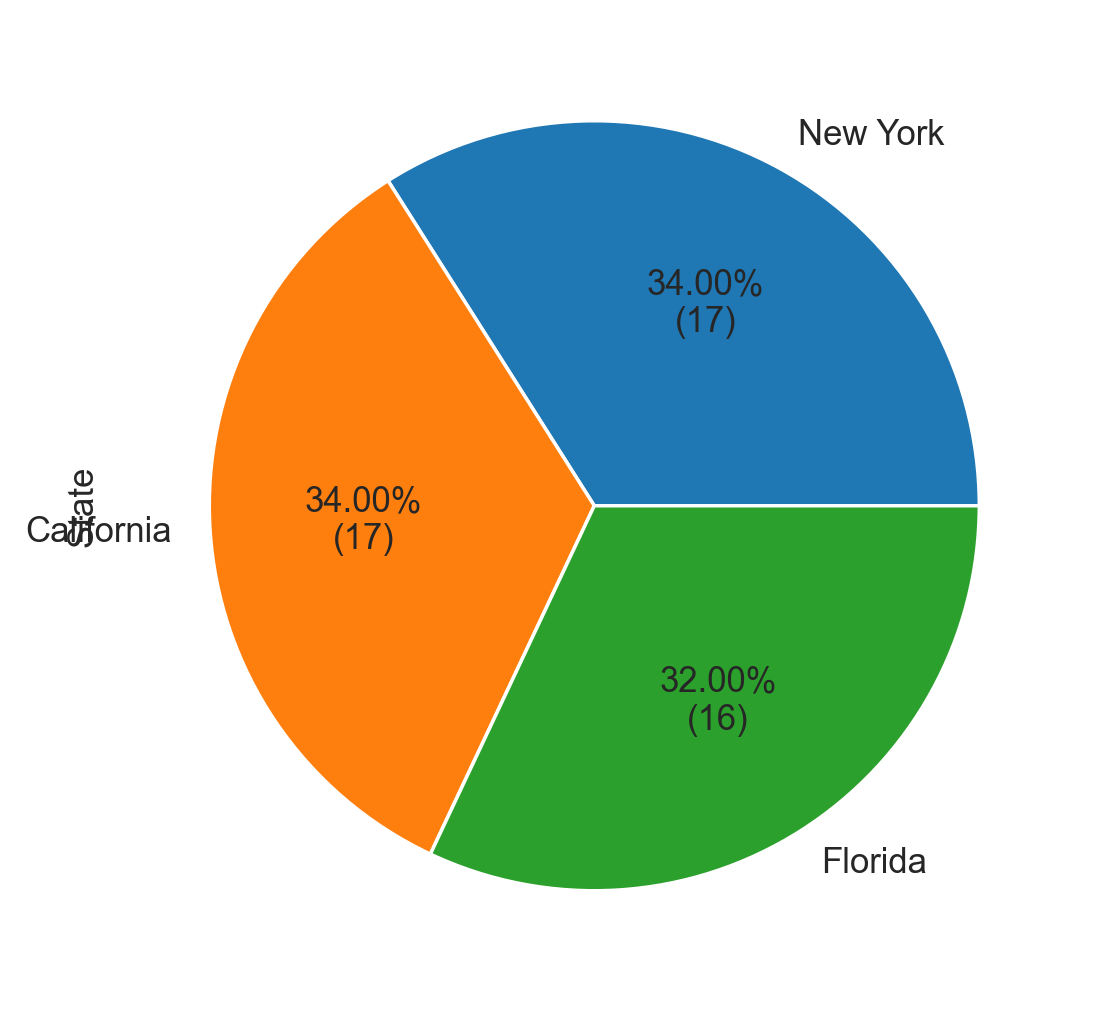

In [30]:
df['State'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['State'].value_counts().sum())))

array([[<AxesSubplot:title={'center':'RnD_Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing_Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

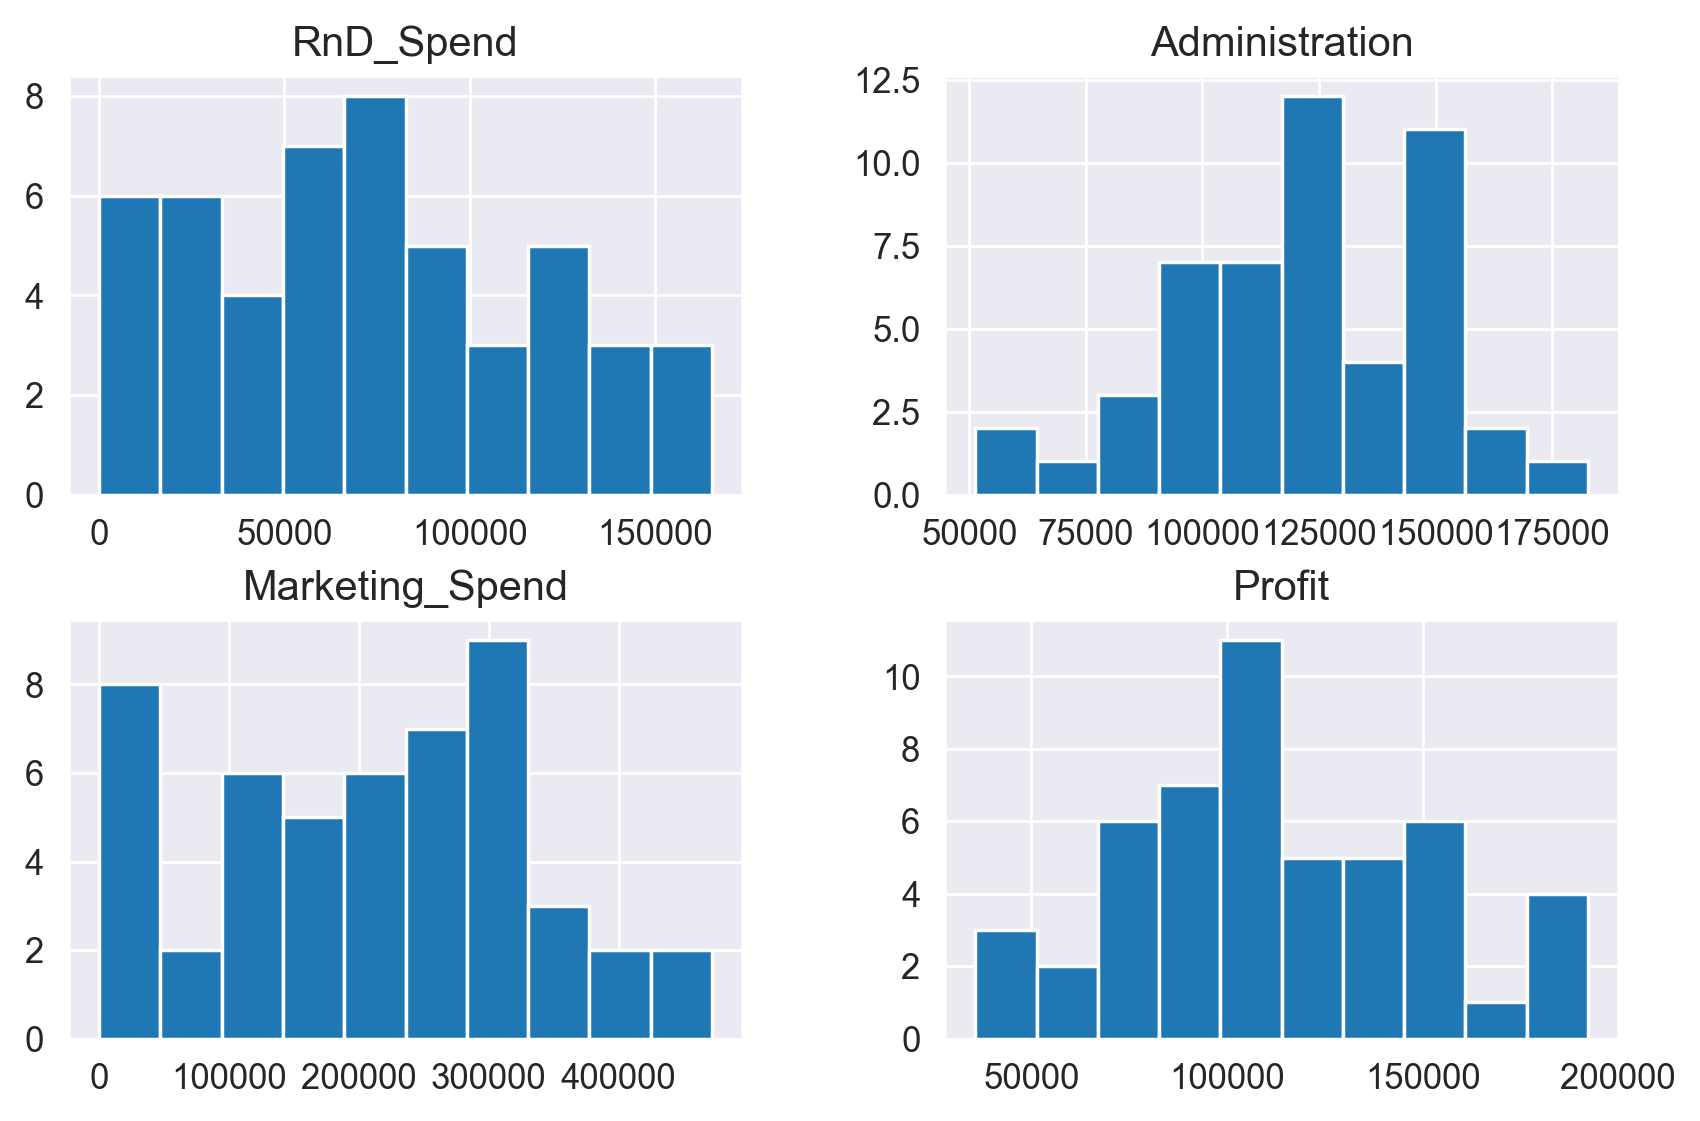

In [31]:
df.hist()

# Feature Scaling

- As per barplot and pie chart of catagorical feature state is not affected on profit featute so we will drop that columns

In [32]:
df1=df.drop('State', axis=1)
df1

,RnD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [33]:
sc=StandardScaler()
df_std_scaled=sc.fit_transform(df1)
df_std_scaled

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         2.09527514e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         2.08271764e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         2.06289194e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.84507578e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.39828987e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.15244823e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.12922928e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.11934116e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
         1.02469067e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
         9.59150954e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01,
         8.61902736e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01,
      

In [34]:
df_std_scaled=pd.DataFrame(data=df_std_scaled, columns=df1.columns)

In [35]:
df_std_scaled

,RnD_Spend,Administration,Marketing_Spend,Profit
0,2.016411,0.560753,2.153943,2.095275
1,1.955860,1.082807,1.923600,2.082718
2,1.754364,-0.728257,1.626528,2.062892
3,1.554784,-0.096365,1.422210,1.845076
4,1.504937,-1.079919,1.281528,1.398290
5,1.279800,-0.776239,1.254210,1.152448
6,1.340066,0.932147,-0.688150,1.129229
7,1.245057,0.871980,0.932186,1.119341
8,1.030369,0.986952,0.830887,1.024691
9,1.091819,-0.456640,0.776107,0.959151


In [36]:
df_std_scaled.rename(columns={'R&D_Spend':'RnD_Spend'}, inplace=True)
df_std_scaled

,RnD_Spend,Administration,Marketing_Spend,Profit
0,2.016411,0.560753,2.153943,2.095275
1,1.955860,1.082807,1.923600,2.082718
2,1.754364,-0.728257,1.626528,2.062892
3,1.554784,-0.096365,1.422210,1.845076
4,1.504937,-1.079919,1.281528,1.398290
5,1.279800,-0.776239,1.254210,1.152448
6,1.340066,0.932147,-0.688150,1.129229
7,1.245057,0.871980,0.932186,1.119341
8,1.030369,0.986952,0.830887,1.024691
9,1.091819,-0.456640,0.776107,0.959151


In [37]:
df_std_scaled

,RnD_Spend,Administration,Marketing_Spend,Profit
0,2.016411,0.560753,2.153943,2.095275
1,1.955860,1.082807,1.923600,2.082718
2,1.754364,-0.728257,1.626528,2.062892
3,1.554784,-0.096365,1.422210,1.845076
4,1.504937,-1.079919,1.281528,1.398290
5,1.279800,-0.776239,1.254210,1.152448
6,1.340066,0.932147,-0.688150,1.129229
7,1.245057,0.871980,0.932186,1.119341
8,1.030369,0.986952,0.830887,1.024691
9,1.091819,-0.456640,0.776107,0.959151


In [38]:
print('Mean Value:',df_std_scaled.mean().round())
print('standard deviation:',df_std_scaled.std())

Mean Value: RnD_Spend          0.0
Administration    -0.0
Marketing_Spend   -0.0
Profit            -0.0
dtype: float64
standard deviation: RnD_Spend          1.010153
Administration     1.010153
Marketing_Spend    1.010153
Profit             1.010153
dtype: float64


# for model building below assumption should be take into account

1. features should be independent of each other, there should not be dependence amoung each other
2. There shouldn't be any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)
3. Each Feature and Model Error (residuals) should be independent of each other
4.Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
5. There should be a linear relation between the dependent variable and Independent variables

###### Note: If any of the above step is not followed our model can't be a good predictor

##### We will Check the above one by one

In [39]:
model=smf.ols('Profit~RnD_Spend+Marketing_Spend+Administration',data=df_std_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           5.06e-25
Time:                        13:06:23   Log-Likelihood:                -8.3307
No. Observations:                  50   AIC:                             24.66
Df Residuals:                      46   BIC:                             32.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.504e-16      0.042  -8.31e-15      1.000      -0.085       0.085
RnD_Spend           0.9077      0.066     13.707      0.000       0.774       1.041
Marketing_Spend     0.0715      0.064      1.112      0.272      -0.058       0.201
Administration     -0.0111      0.046     -0.242      0.810      -0.103       0.081
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model.params

Intercept         -3.504141e-16
RnD_Spend          9.076733e-01
Marketing_Spend    7.149879e-02
Administration    -1.107482e-02
dtype: float64

In [41]:
display(model.tvalues, model.pvalues)

Intercept         -8.314544e-15
RnD_Spend          1.370675e+01
Marketing_Spend    1.112189e+00
Administration    -2.424140e-01
dtype: float64

Intercept          1.000000e+00
RnD_Spend          7.419553e-18
Marketing_Spend    2.718359e-01
Administration     8.095370e-01
dtype: float64

- As Y = Beta0 + Beta1(X1) + Beta2(X2) +Beta3(X3) + .................. + Beta n(Xn)
- Finding Coefficient Parameters (Beta0 and Beta1's values)

- Here, (Intercept) Beta0 p_value ~ 1
- Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
- Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)
- As pvalue of Marketing_Spend & Administration is greater than 0.05 so we fail to reject the null hypothesis as Beta=0(No Slope). We do not have sufficient evidence to say that the sample data providing those features have any dependency towards the dependent variable

##### We are now going to perform Simple Linear Regression to separately check the dependency between those(Admin & Marketing) feature with Target feature

In [42]:
admin_slr_model=smf.ols('Profit~Administration',data=df_std_scaled).fit()
display(admin_slr_model.tvalues,admin_slr_model.pvalues)

Intercept        -2.481081e-15
Administration    1.460285e+00
dtype: float64

Intercept         1.000000
Administration    0.150727
dtype: float64

Here pvalue is greater than 0.05.

In [43]:
display(admin_slr_model.rsquared,admin_slr_model.rsquared_adj)

0.04253598005056747

0.02258881296828774

In [44]:
Marketing_slr_model=smf.ols('Profit~Marketing_Spend',data=df_std_scaled).fit()
display(Marketing_slr_model.tvalues,Marketing_slr_model.pvalues)

Intercept         -3.547965e-15
Marketing_Spend    7.383556e+00
dtype: float64

Intercept          1.000000e+00
Marketing_Spend    1.903440e-09
dtype: float64

- Here pvalue is less than 0.05 so we reject the null hypothesis.

In [45]:
display(Marketing_slr_model.rsquared,Marketing_slr_model.rsquared_adj)

0.53178449954098

0.5220300099480837

### ^Observation: Marketing feature alone can explain 54% and Adminstration at 4% of the variance with repect to the profit if acknowledged there are other features as well
- The p_value of Administration is greater than 0.5 hence by the test of independence, we fail to reject Null Hypothesis
- We have found lack of evidence to state that administration has any dependency with respect to Profit atleast in this testing


## Let's Try another Test by Calculating VIF ( Variance Inflation Factor )

In [46]:
df_std_scaled.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

In [47]:
r_RnD_Spend=smf.ols('RnD_Spend~Administration+Marketing_Spend', data=df_std_scaled).fit().rsquared
vif_RnD_Spend=1/(1-r_RnD_Spend)

r_Administration=smf.ols('Administration~RnD_Spend+Marketing_Spend', data=df_std_scaled).fit().rsquared
vif_Administration=1/(1-r_Administration)

r_Marketing_Spend=smf.ols('Marketing_Spend~RnD_Spend+Administration', data=df_std_scaled).fit().rsquared
vif_Marketing_Spend=1/(1-r_Marketing_Spend)

In [48]:
vif=pd.DataFrame({
   'Features':['RnD_Spend','Administration','Marketing_Spend'],
 'VIF':[vif_RnD_Spend,vif_Administration,vif_Marketing_Spend] 
})

vif

,Features,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


###### None of the variables has VIF>20, No Collinearity, but we cannot consider all varaibles in Regression equation

In [49]:
display(model.rsquared, model.aic)

0.9182958360807372

24.661337697924708

In [50]:
print('Model with all independent variable:','\n','R_Squared value:',model.rsquared,'AIC Value:',model.aic)

Model with all independent variable: 
 R_Squared value: 0.9182958360807372 AIC Value: 24.661337697924708


In [51]:
model_without_admin=smf.ols('Profit~RnD_Spend+Marketing_Spend',data=df_std_scaled).fit()
print('Model without admin:','\n','R_Squared value:',model_without_admin.rsquared,'AIC Value:',model_without_admin.aic)

Model without admin: 
 R_Squared value: 0.9181914598331342 AIC Value: 22.72517143021065


#### As we can see from above model_without_admin has less AIC Value, and we prefer the model having high R Squared value and low AIC. 
- The Model that was build without using Administration feature performed very well.
- We are going to rebuild the model by dropping the Administration feature

In [52]:
final_model=smf.ols('Profit~RnD_Spend+Marketing_Spend',data=df_std_scaled).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     263.8
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           2.82e-26
Time:                        13:09:30   Log-Likelihood:                -8.3626
No. Observations:                  50   AIC:                             22.73
Df Residuals:                      47   BIC:                             28.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.504e-16      0.042   -8.4e-15      1.000      -0.084       0.084
RnD_Spend           0.9015      0.061     14.900      0.000       0.780       1.023
Marketing_Spend     0.0763      0.061      1.262      0.213      -0.045       0.198
==============================================================================
Omnibus:                       45.205   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.487
Skew:                           2.220   Prob(JB):                     1.47e-50
Kurtosis:                      12.510   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL VALIDATION TECHNIQUES

### 1.Residual Analysis

#### NORMALITY TEST

In [53]:
import statsmodels.api as sm

In [54]:
final_model.resid

0     0.113081
1     0.172692
2     0.357190
3     0.334889
4    -0.056222
5    -0.097018
6    -0.026308
7    -0.074225
8     0.032397
9    -0.084359
10    0.291182
11    0.253038
12    0.316570
13    0.157360
14   -0.445147
15   -0.412736
16    0.231805
17   -0.153260
18   -0.132849
19    0.118998
20    0.017348
21   -0.217118
22   -0.157869
23   -0.073842
24   -0.163878
25    0.052681
26   -0.201079
27   -0.294724
28   -0.072524
29   -0.117620
30   -0.064412
31   -0.111151
32   -0.131159
33   -0.097754
34    0.082794
35    0.088062
36    0.280765
37   -0.042583
38    0.204702
39   -0.158419
40   -0.036460
41   -0.025912
42   -0.099589
43    0.086215
44   -0.163468
45    0.266003
46   -0.338987
47   -0.310832
48   -0.505665
49    1.409397
dtype: float64

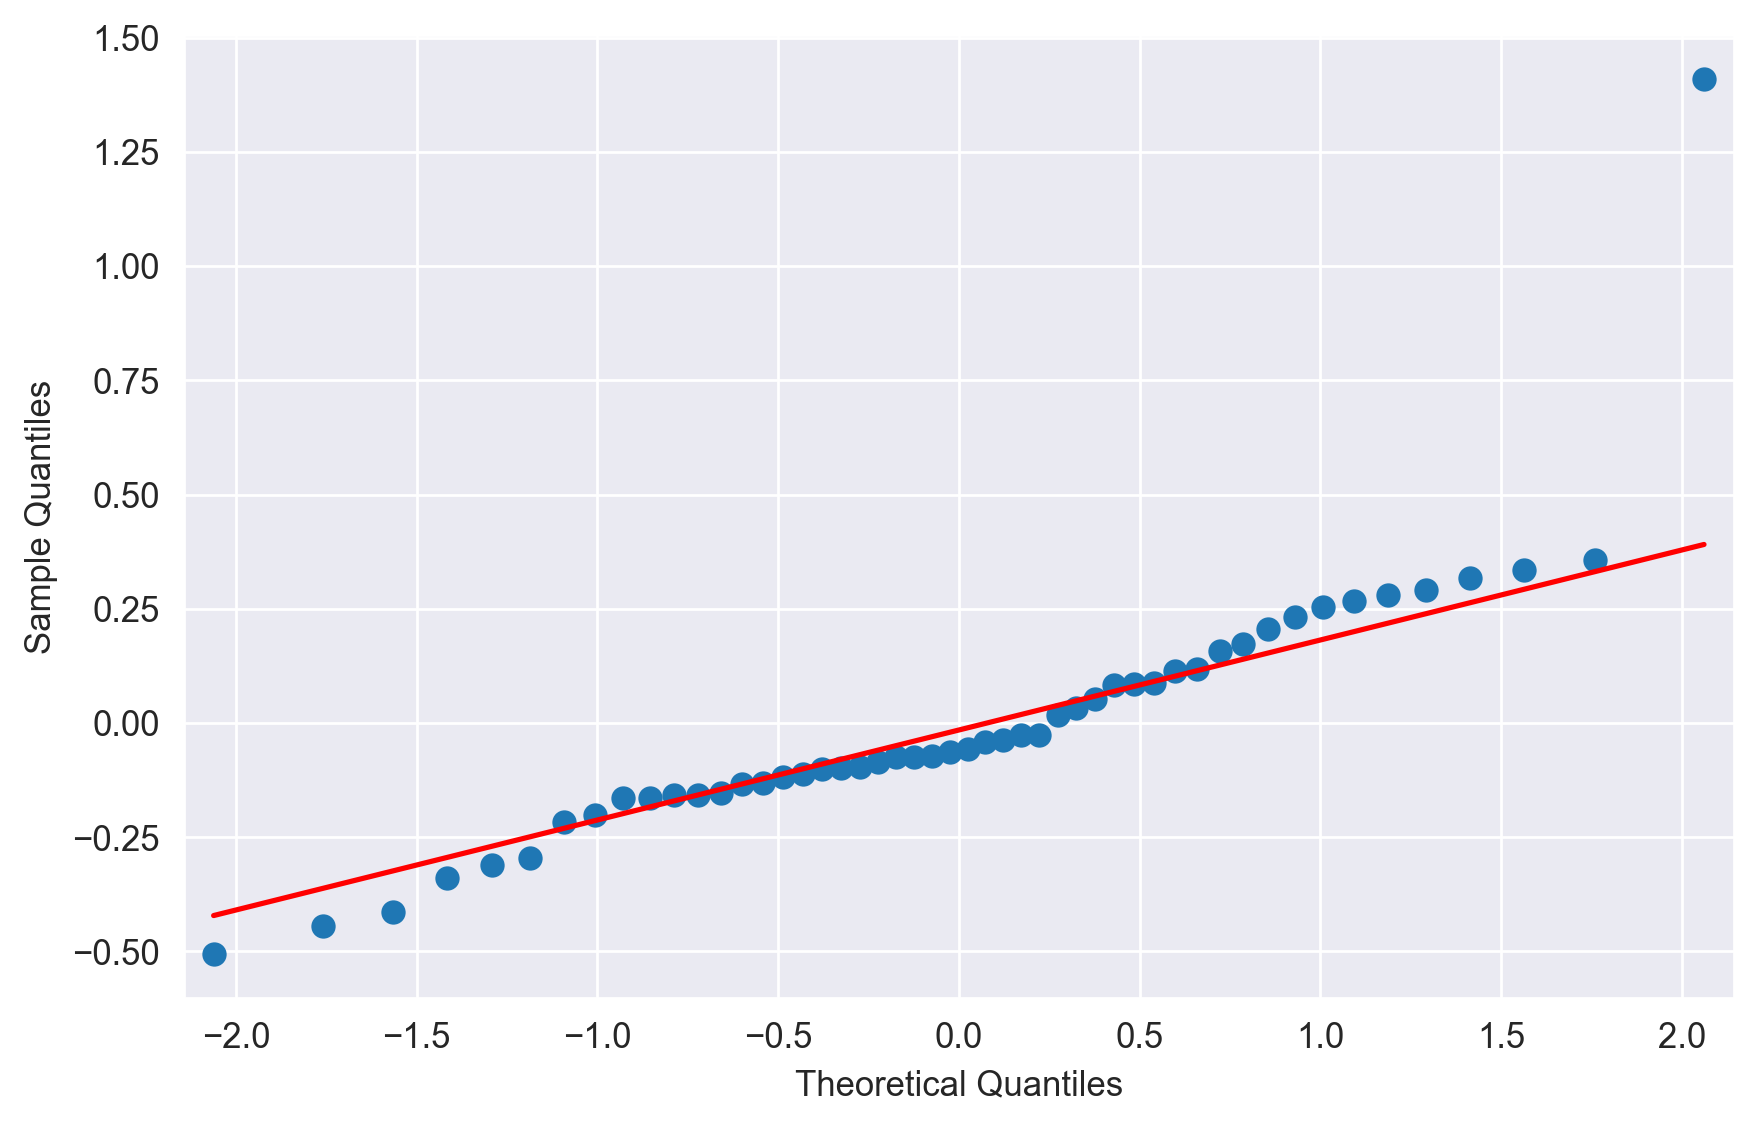

In [55]:
#QQ Plot
sm.qqplot(final_model.resid,line='q')
plt.show()

In [56]:
np.where(final_model.resid>1.25)

(array([49], dtype=int64),)

## 2. Residual plot of Homoscedasticity
- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

Text(0, 0.5, 'Residuals')

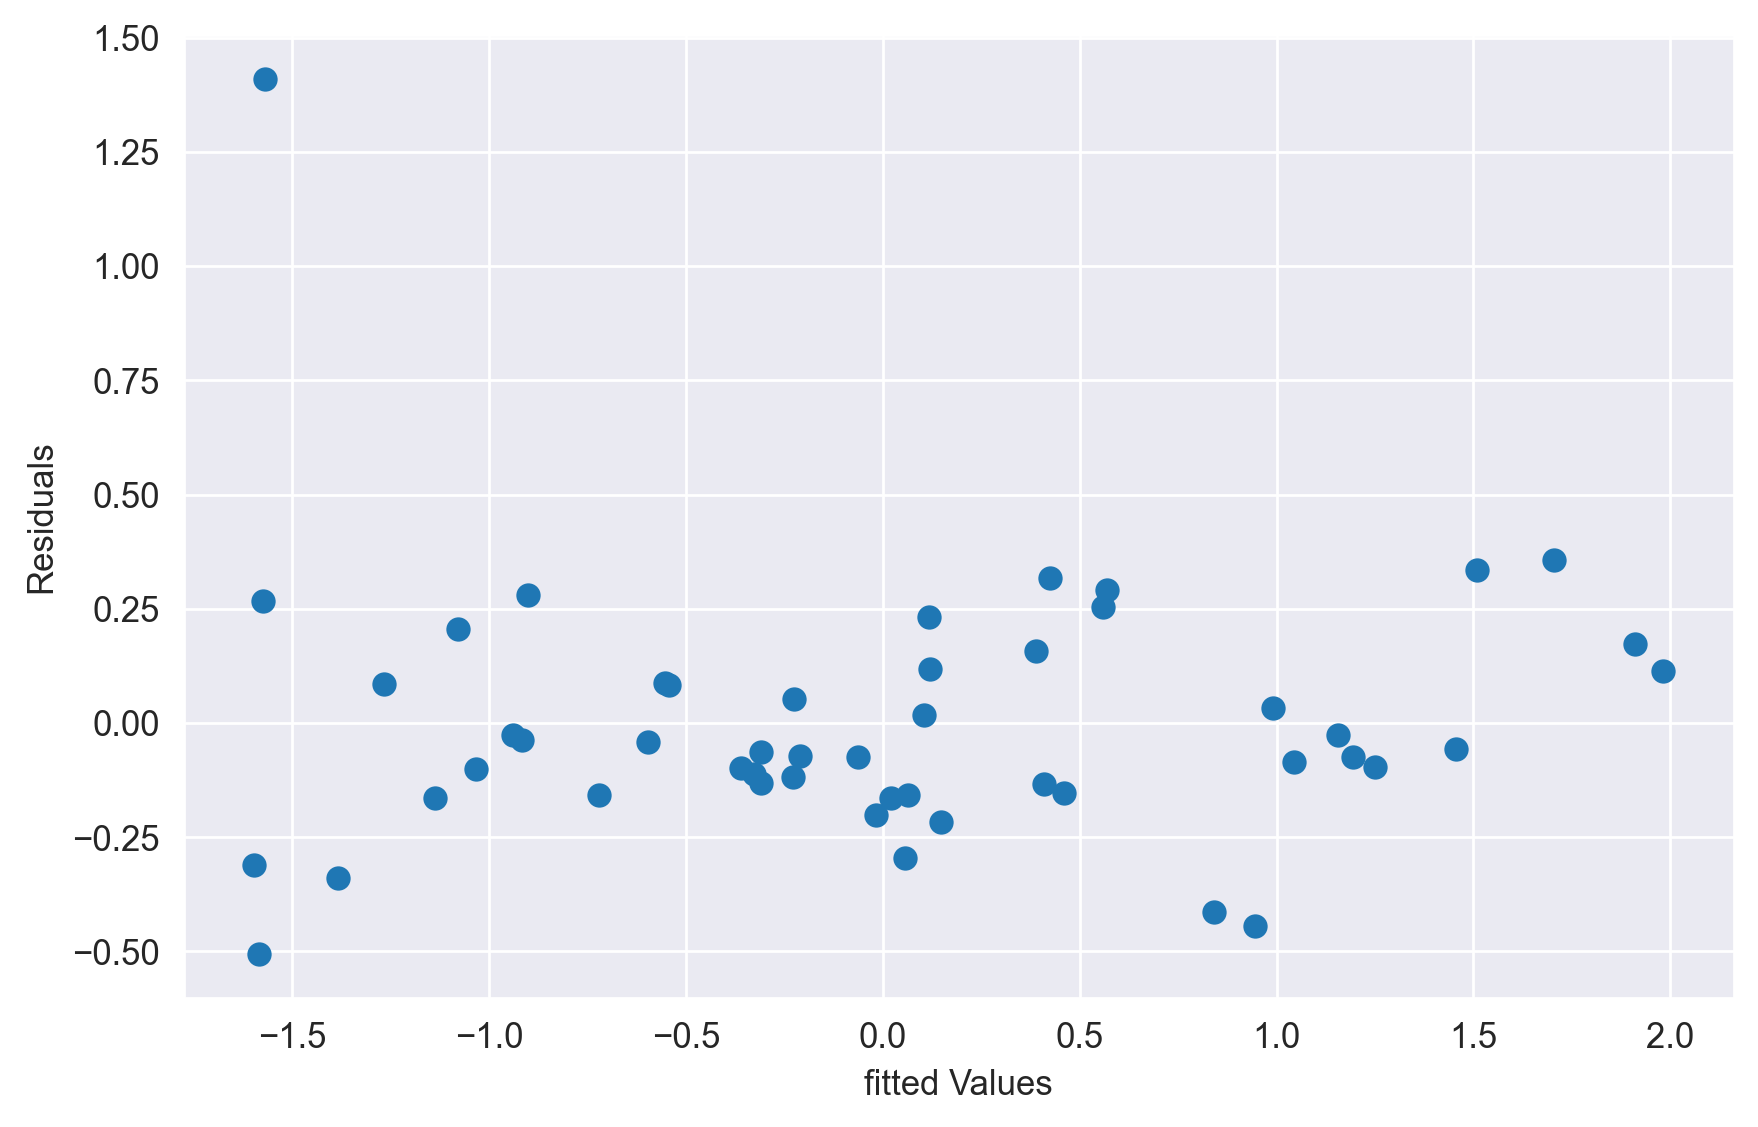

In [57]:
plt.scatter(final_model.fittedvalues,final_model.resid)
plt.xlabel('fitted Values')
plt.ylabel('Residuals')

## 3.Residual VS Regressor

eval_env: 1


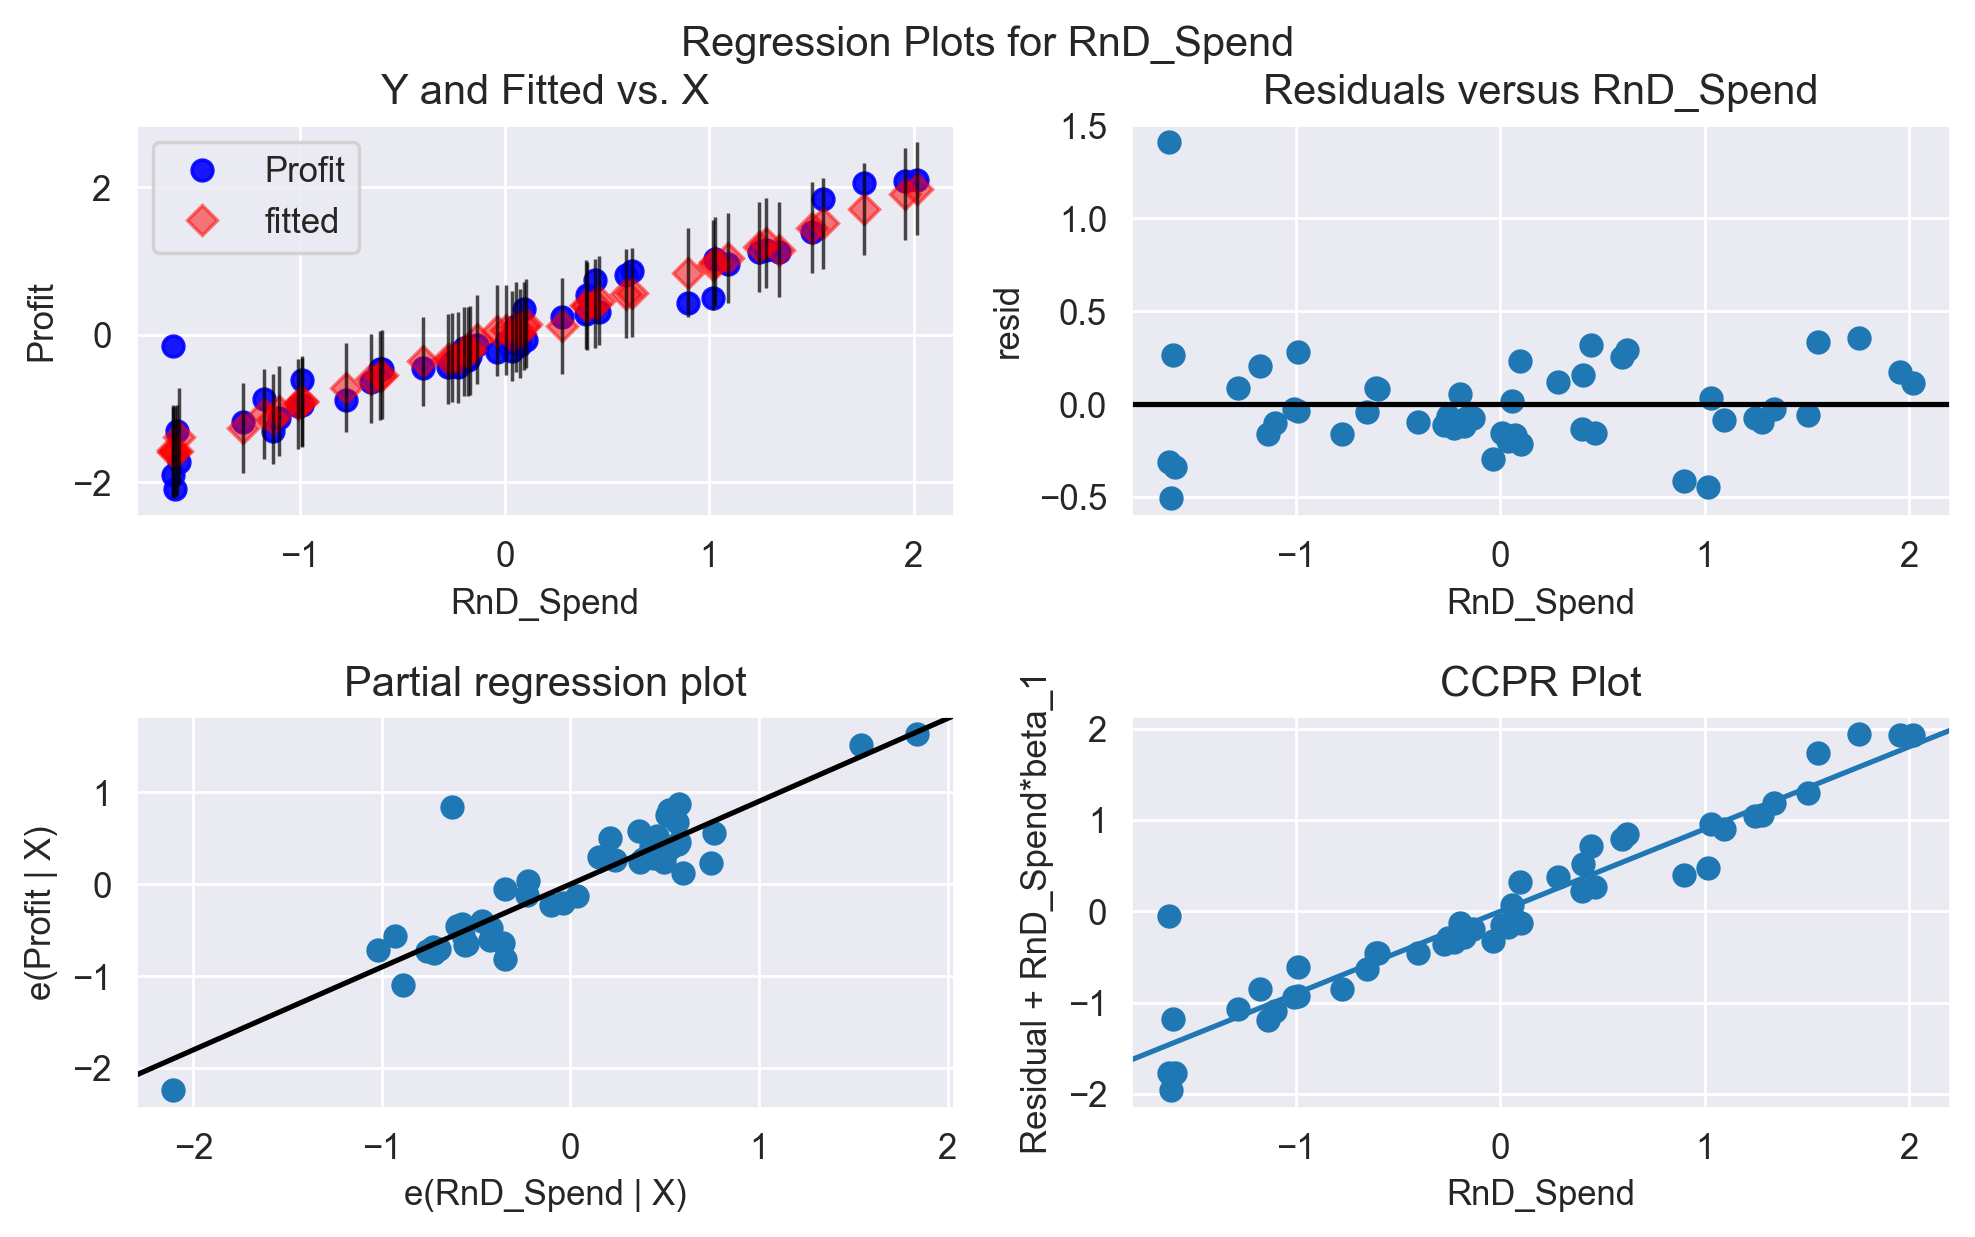

In [58]:
sm.graphics.plot_regress_exog(final_model,'RnD_Spend')
plt.show()

eval_env: 1


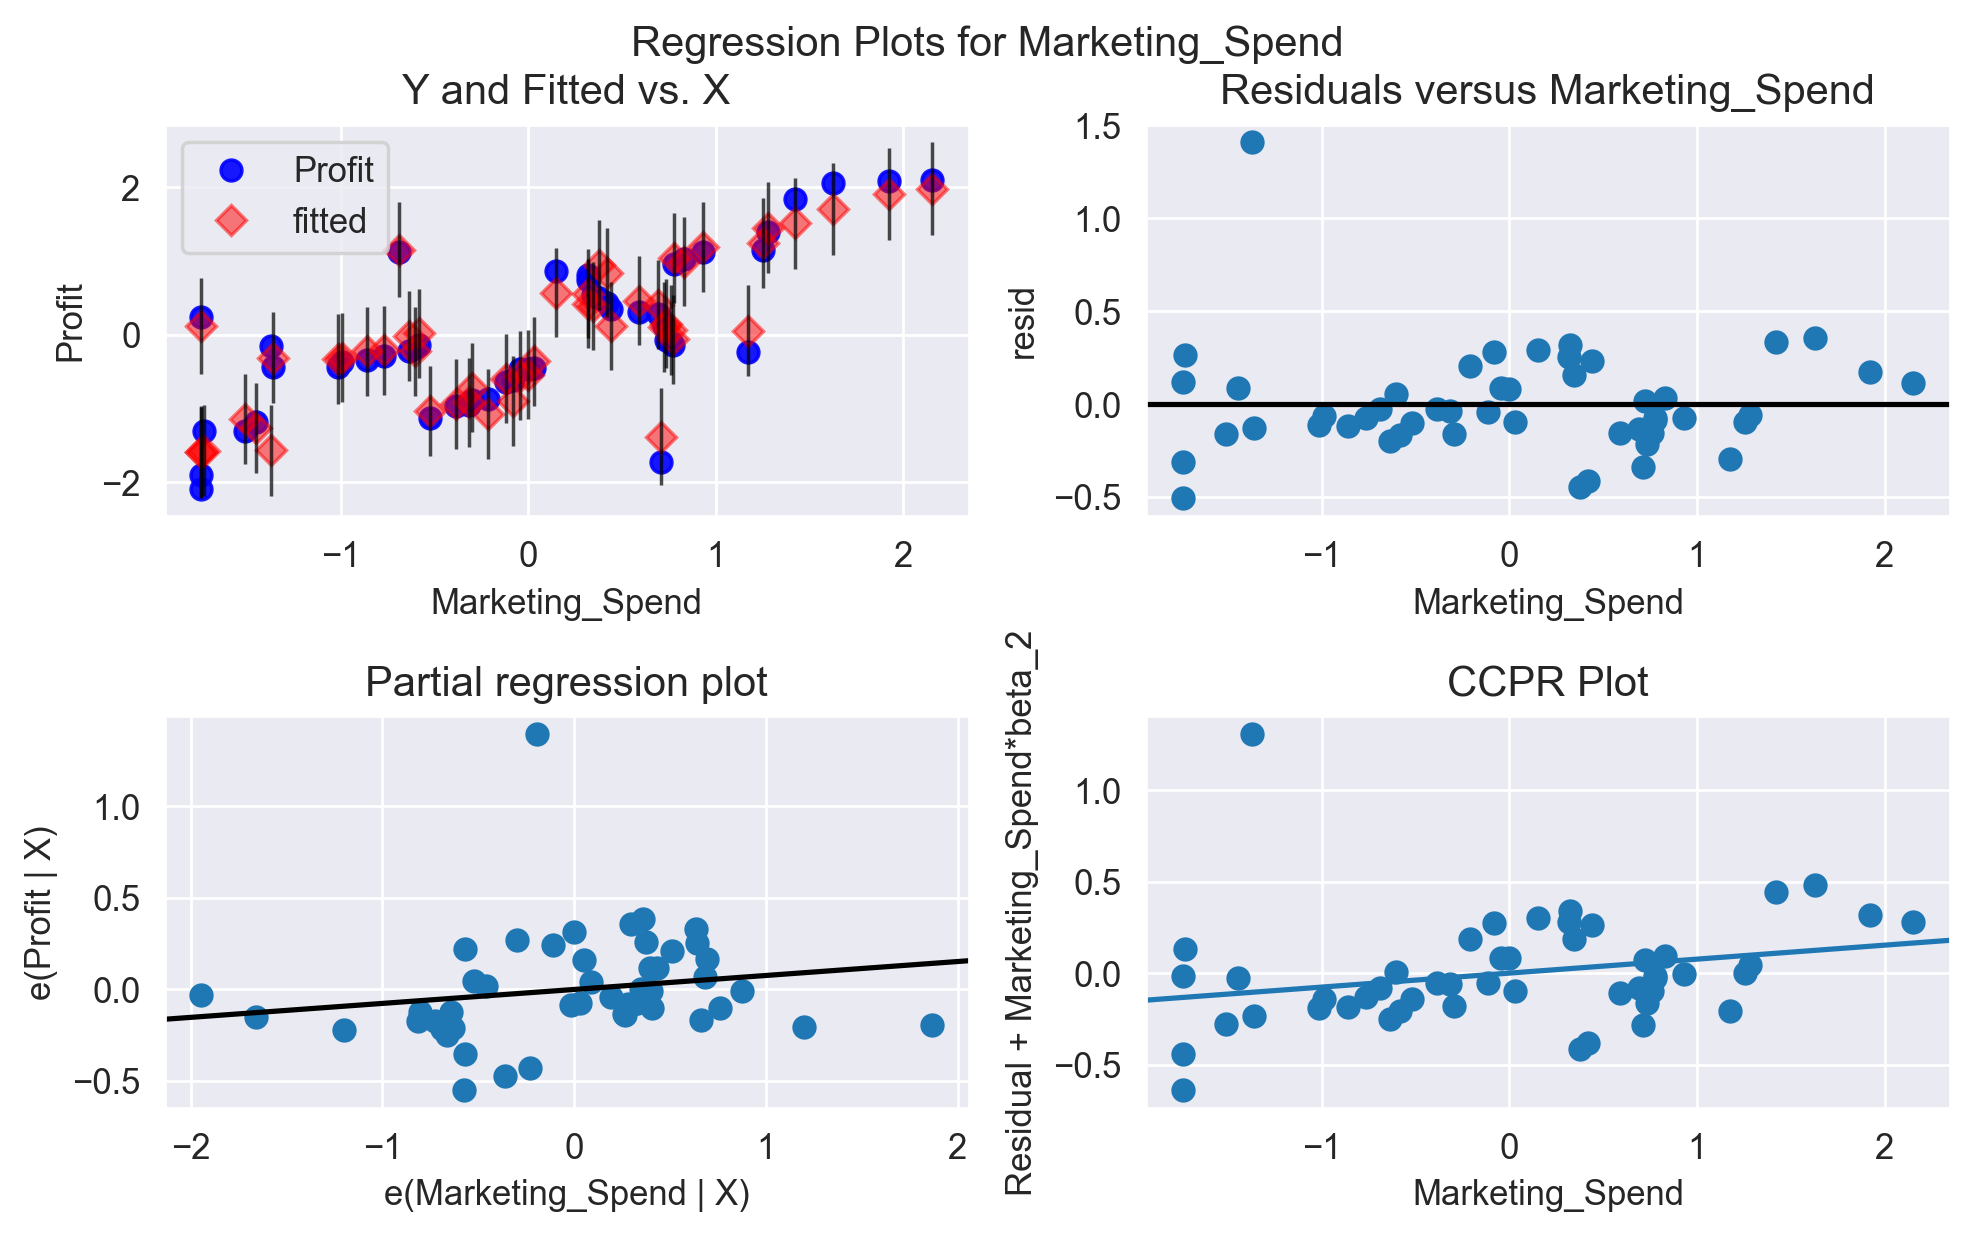

In [59]:
sm.graphics.plot_regress_exog(final_model,'Marketing_Spend')
plt.show()

### ^Observation:
- Each Feature and Model Error (residuals) should be independent of each other
- There should be a linear relation between the dependent variable and Independent variables

### Note: All our assumptions are satisfied. Hence, we can say our model is a good model let us test more to make it even better

# Detecting Influencers/Outliers in the Model

# Cook's Distance
- Cook's Distance should be less than 1. if the cook's distance of data point is greater than 1 we have to remove that data points

In [60]:
inf=final_model.get_influence()
c,p=inf.cooks_distance
c,p

(array([7.71466896e-03, 1.53835947e-02, 5.09212444e-02, 3.59337055e-02,
        9.29281647e-04, 2.32284625e-03, 6.63096523e-04, 1.19602307e-03,
        1.81751047e-04, 1.30733763e-03, 1.08950357e-02, 7.14203983e-03,
        9.64093876e-03, 2.32173175e-03, 3.85184599e-02, 2.70735700e-02,
        5.64056677e-03, 2.56878683e-03, 2.16062800e-03, 1.46089976e-02,
        4.96472268e-05, 7.50743392e-03, 4.61508035e-03, 1.21944094e-03,
        4.11136804e-03, 3.34874987e-04, 6.43631975e-03, 3.17209328e-02,
        8.28739831e-04, 2.48645142e-03, 8.51001106e-04, 2.58649196e-03,
        6.35671501e-03, 1.06562123e-03, 9.90079631e-04, 1.08343365e-03,
        1.92385600e-02, 2.52060869e-04, 1.19187603e-02, 3.59969408e-03,
        2.59465551e-04, 1.28049265e-04, 1.99040293e-03, 2.08994925e-03,
        7.69218504e-03, 2.74412718e-02, 1.55903082e-01, 3.82098275e-02,
        1.00628014e-01, 6.59051903e-01]),
 array([0.99905571, 0.99736042, 0.98463149, 0.99075926, 0.99996027,
        0.99984318, 0.9999

<StemContainer object of 3 artists>

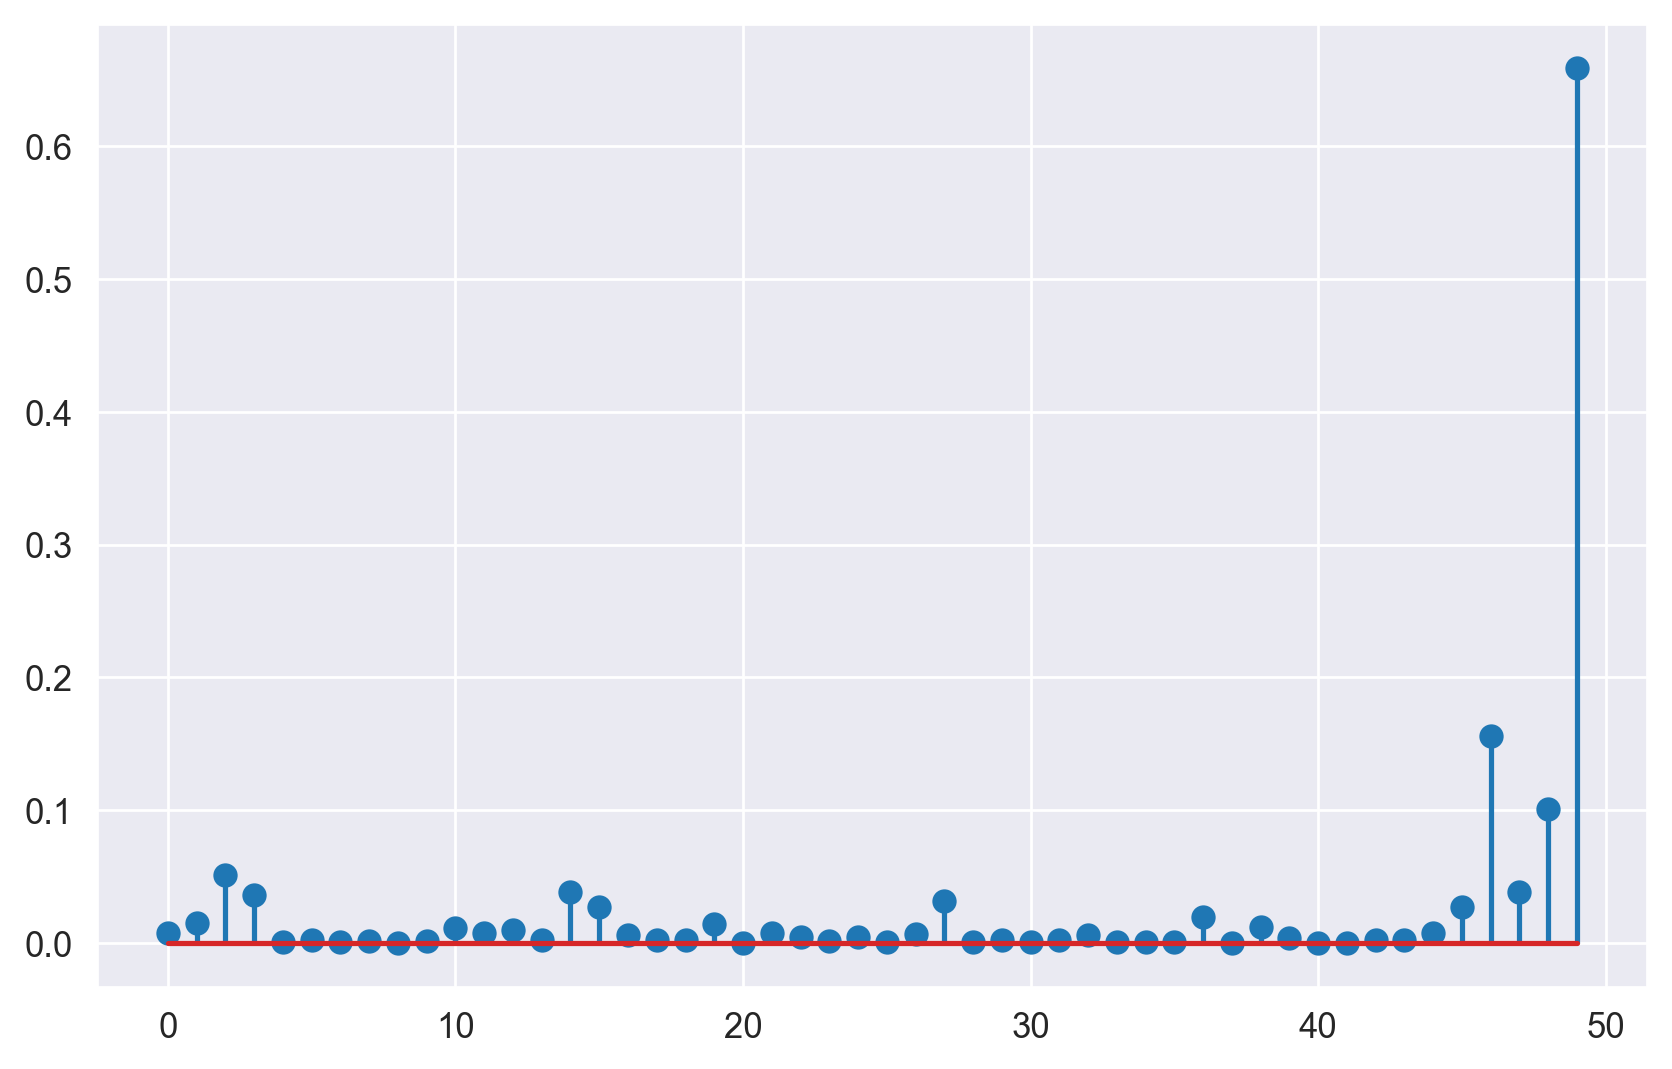

In [61]:
#Cook's Distance plot
plt.stem(range(len(df_std_scaled)),c)

In [62]:
len(df_std_scaled)

50

In [63]:
np.argmax(c), np.max(c)

(49, 0.6590519027029234)

In [64]:
df.iloc[[49]]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,107978.19


In [65]:
#Calculate cutoff

k = len(df_std_scaled.columns)
n = len(df_std_scaled)

cut_off = 3*(k+1)/n
cut_off

0.3

In [66]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

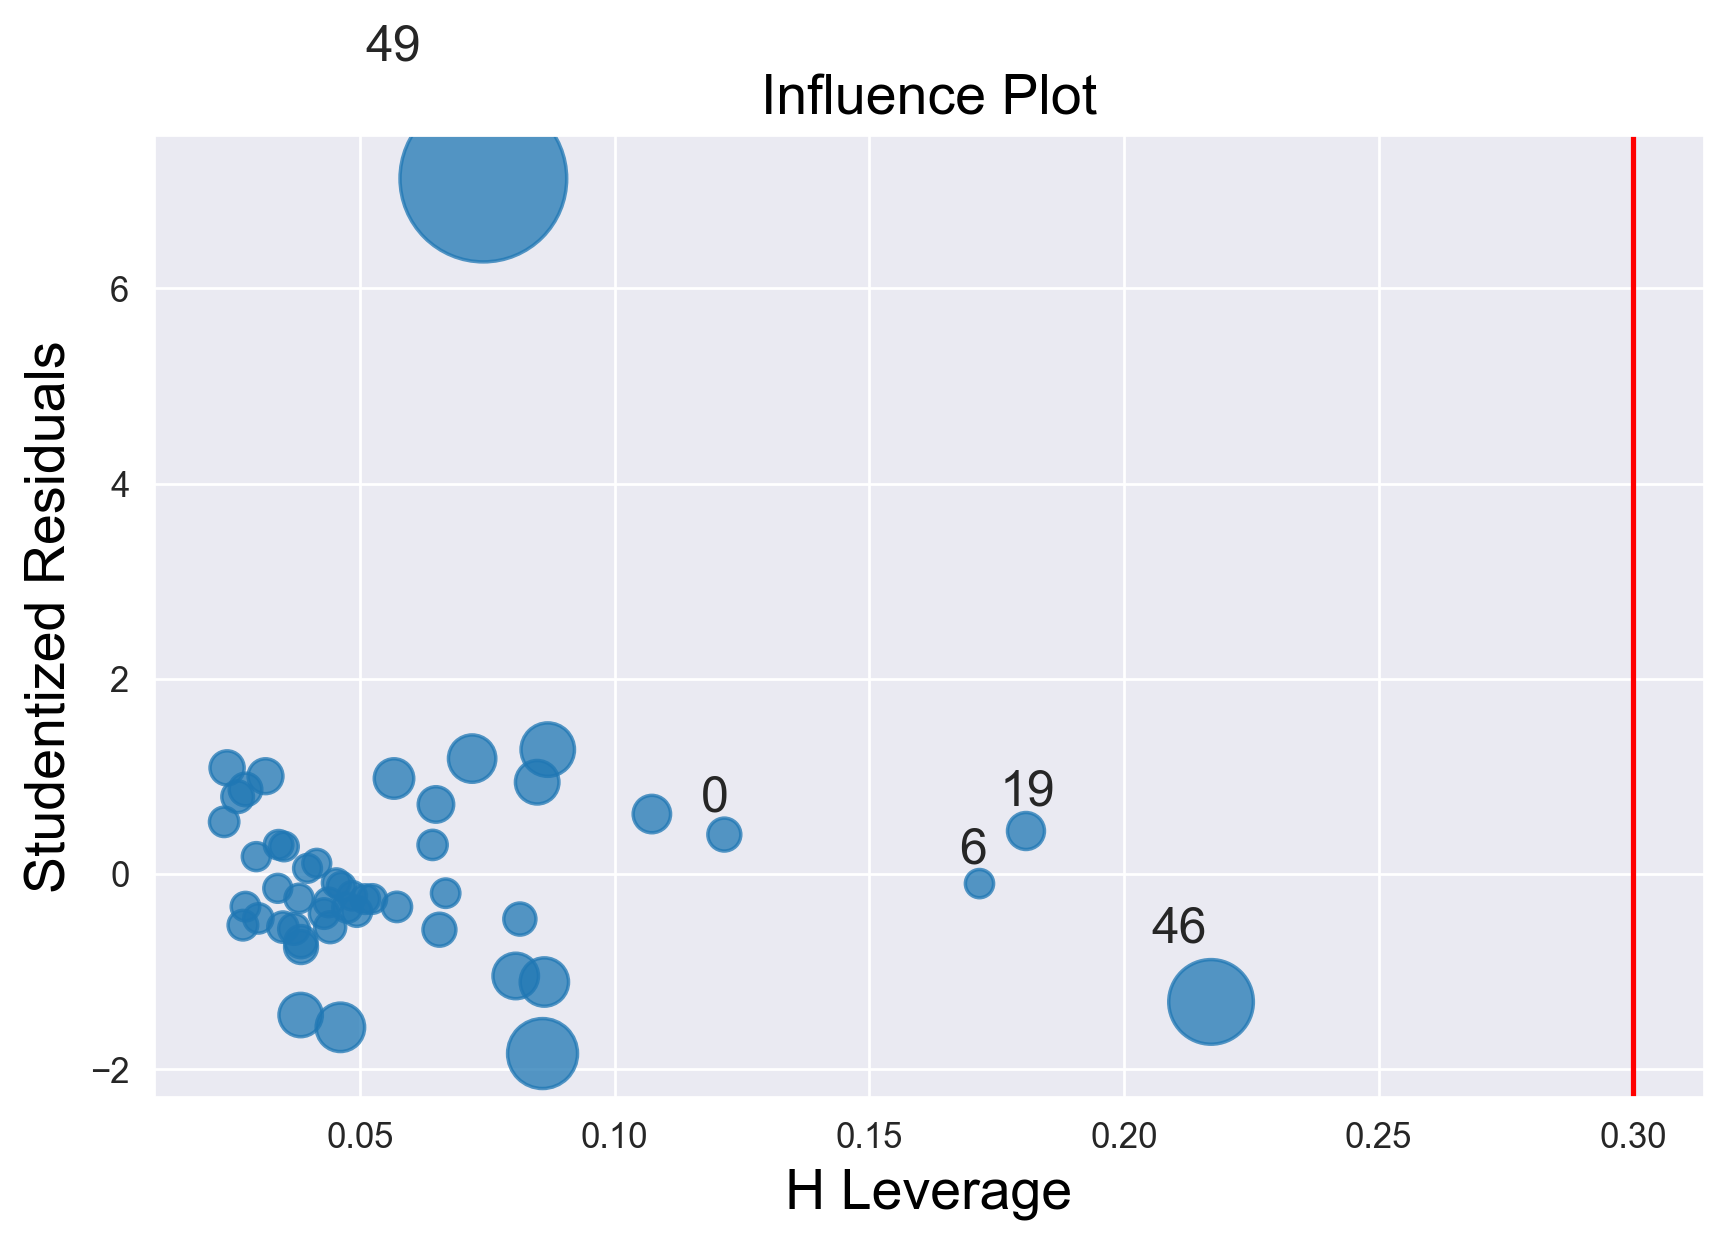

In [67]:
influence_plot(final_model)
plt.axvline(cut_off, color='red')

#### ^Observation: All the points are below our cut-off line
- Hence, we can say that there are no influncers present in our model we can proceed with the predictions

## Predicting values from Model using same dataset

In [68]:
predicted = pd.DataFrame()
predicted['RnD_Spend'] = df1.RnD_Spend
predicted['Marketing_Spend'] = df1.Marketing_Spend
predicted['Profit'] = df1.Profit

In [69]:
predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD_Spend','Marketing_Spend']]))

In [70]:
predicted

,RnD_Spend,Marketing_Spend,Profit,Predicted_Profit
0,165349.20,471784.10,192261.83,1.850725e+05
1,162597.70,443898.53,191792.06,1.804635e+05
2,153441.51,407934.54,191050.39,1.694642e+05
3,144372.41,383199.62,182901.99,1.594004e+05
4,142107.34,366168.42,166187.94,1.560585e+05
5,131876.90,362861.36,156991.12,1.465834e+05
6,134615.46,127716.82,156122.51,1.311037e+05
7,130298.13,323876.68,155752.60,1.421844e+05
8,120542.52,311613.29,152211.77,1.324538e+05
9,123334.88,304981.62,149759.96,1.344649e+05
